# Full RF application.

 Applying random forest ml component to every theoretical model.  
 applying ZN and ZQ.

In [253]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from operator import itemgetter, attrgetter

In [254]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

In [255]:
def nbindingE(Z,N):  #New Binding Energy Function
    A=Z+N
    a_v  =15.422
    a_s  =16.831
    a_c  =0.686
    a_a  =26.002
    a_as =-18.711
    a_p  = 11.199
    
    if((Z%2 ==0) and (N%2==0)):
        #print("even-even")
        n=1

    elif((Z%2 !=0) and (N%2!=0)):
        n=-1
        #print("odd-odd")
    else:
        n=0
        #print("even-odd")
    
    p_1 = a_v * A
    
    p_2 = a_s * (A**(2/3))

    p_3 = a_c * ( (Z**2)/(A**(1/3)) )
    
    p_4 = a_a + a_as/(A**(1/3))
    
    p_5 = ((A-(2*Z))**2)/A
    
    p_6 = a_p*n/(A**(1/2))
    
    
    
    B= p_1 -p_2 -p_3 -p_4 * p_5 -p_6
    
    return B
    

In [256]:
def ki(exp,the):
    ki_2=0
    
    #print(exp_the[0], "\n\n")
    
    
    for i in range(0, len(exp)):
        ki_2=ki_2+(exp[i]-the[i])**2
    
    #print(len(exp_the)) 
    return np.sqrt(ki_2/(len(exp)))

Inputting Data

In [229]:
#END OF DATA INPUT
#SKMS_all_nuclei-new.dat
#SKP_all_nuclei.dat
#SLY4_all_nuclei-new.dat

#SV-MIN_all_nuclei-new.dat
#UNEDF0_all_nuclei-new.dat
#UNEDF1_all_nuclei-new.dat

#6 Different theoretical Models


names=["SKMS_all_nuclei-new.dat", 
       "SKP_all_nuclei.dat",
       "SLY4_all_nuclei-new.dat", 
       "SV-MIN_all_nuclei-new.dat", 
       "UNEDF0_all_nuclei-new.dat", 
       "UNEDF1_all_nuclei-new.dat"]

#Experimental: skip_header=350, skip_footer=3433-2953
skip_H=[347,  304,  287,  316,  321,  310    ]
#skip_H =[0,    0,    0,    0,    0,    0  ]

top_F=[ 8700, 7478, 7264, 7924, 8300, 8324   ]
#top_F =[0,    0,    0,    0,    0,    0  ]
#skip_F=[0,    0,    0,    0,    0,    0  ]
skip_F=[5606, 4977, 4806, 5176, 5412, 5323   ]

Z_the    =[[],[],[],[],[],[]]
N_the    =[[],[],[],[],[],[]]
A_the    =[[],[],[],[],[],[]]

y_the    =[[],[],[],[],[],[]]
y_the_d  =[{},{},{},{},{},{}]

Q_the    =[[],[],[],[],[],[]]
Q_the_d  =[{},{},{},{},{},{}]

S_p_the  =[[],[],[],[],[],[]]
S_p_the_d=[{},{},{},{},{},{}]

S_2p_the    =[[],[],[],[],[],[]]
S_2p_the_d  =[{},{},{},{},{},{}]


S_n_the    =[[],[],[],[],[],[]]
S_n_the_d  =[{},{},{},{},{},{}]


S_2n_the   =[[],[],[],[],[],[]]
S_2n_the_d =[{},{},{},{},{},{}]

X_the      =[[],[],[],[],[],[]]

ZN_the    =[[],[],[],[],[],[]]
ZN_the_d  =[{},{},{},{},{},{}]
X_the    =[[],[],[],[],[],[]]

for i in range(0,6):
    Z_the [i]   = np.genfromtxt(names[i],usecols=1, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i])) #Number of protons
    N_the [i]   = np.genfromtxt(names[i],usecols=2, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i])) #Number of neutrons
    A_the [i]   = N_the[i]+Z_the[i]                     

    y_the [i]   = -np.genfromtxt(names[i],usecols=4, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(y_the[i])):
        y_the_d[i][Z_the[i][j],N_the[i][j]]=y_the[i][j]
    
    
    Q_the [i]   = -np.genfromtxt(names[i],usecols=9, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(Q_the[i])):
        Q_the_d[i][Z_the[i][j],N_the[i][j]]=Q_the[i][j]
    
    
    S_p_the  [i]= -np.genfromtxt(names[i],usecols=5, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_p_the[i])):
        S_p_the_d[i][Z_the[i][j],N_the[i][j]]=S_p_the[i][j]
    
    
    S_2p_the [i]= -np.genfromtxt(names[i],usecols=6, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_2p_the[i])):
        S_2p_the_d[i][Z_the[i][j],N_the[i][j]]=S_2p_the[i][j]
    
    
    S_n_the [i] = -np.genfromtxt(names[i],usecols=7, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_n_the[i])):
        S_n_the_d[i][Z_the[i][j],N_the[i][j]]=S_n_the[i][j]
    
    
    S_2n_the[i] = -np.genfromtxt(names[i],usecols=8, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_2n_the[i])):
        S_2n_the_d[i][Z_the[i][j],N_the[i][j]]=S_2n_the[i][j]
    
    ZN_the[i]= np.transpose(np.stack( (Z_the[i],N_the[i]) ))
    
    for j in range(0,len(ZN_the[i])):
        ZN_the_d[i][Z_the[i][j], N_the[i][j]]  =ZN_the[i][j]
    
    X_the[i]= np.transpose(np.stack(  (Z_the[i],      #0
                                       N_the[i],      #1
                                       A_the[i],      #2
                                       y_the[i],      #3
                                       S_p_the[i],    #4
                                       S_n_the[i],    #5
                                       S_2p_the[i],   #6
                                       S_2n_the[i],   #7
                                       Q_the[i]) ))   #8
     


In [230]:
exp_h=350
exp_f=3433-3046

N_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3, skip_header=exp_h, skip_footer=exp_f)
Z_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4, skip_header=exp_h, skip_footer=exp_f)
A_exp    = N_exp+Z_exp                                                        #Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y_exp    = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5, skip_header=exp_h, skip_footer=exp_f)

S_p_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=12, skip_header=exp_h, skip_footer=exp_f)
S_2p_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=18, skip_header=exp_h, skip_footer=exp_f)

S_n_exp  =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=9, skip_header=exp_h, skip_footer=exp_f)
S_2n_exp =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=15, skip_header=exp_h, skip_footer=exp_f)


ZN_exp   = np.transpose(np.stack((Z_exp, N_exp)))
X_exp    = np.transpose(np.stack((Z_exp, N_exp,   A_exp,   y_exp,   S_p_exp,   S_n_exp,   S_2p_exp,   S_2n_exp)))

y_exp_d={}
S_n_exp_d={}
S_2n_exp_d={}
S_p_exp_d={}
S_2p_exp_d={}



for i in range(0,len(N_exp)):
    y_exp_d[     Z_exp[i],   N_exp[i]]=  y_exp[i]
    
    S_n_exp_d[   Z_exp[i],   N_exp[i]]=  S_n_exp[i]
    S_2n_exp_d[  Z_exp[i],   N_exp[i]]=  S_2n_exp[i]
    
    S_p_exp_d[   Z_exp[i],   N_exp[i]]=  S_p_exp[i]
    S_2p_exp_d[  Z_exp[i],   N_exp[i]]=  S_2p_exp[i]
    

y_mat_the         =[[],[],[],[],[],[]]
y_mat_exp         =[[],[],[],[],[],[]]    
ZN_y_mat          =[[],[],[],[],[],[]]

S_p_mat_the       =[[],[],[],[],[],[]]
S_p_mat_exp       =[[],[],[],[],[],[]]
ZN_S_p_mat        =[[],[],[],[],[],[]]

S_2p_mat_the      =[[],[],[],[],[],[]]
S_2p_mat_exp      =[[],[],[],[],[],[]]
ZN_S_2p_mat       =[[],[],[],[],[],[]]

S_n_mat_the       =[[],[],[],[],[],[]]
S_n_mat_exp       =[[],[],[],[],[],[]]
ZN_S_n_mat        =[[],[],[],[],[],[]]

S_2n_mat_the      =[[],[],[],[],[],[]]
S_2n_mat_exp      =[[],[],[],[],[],[]]
ZN_S_2n_mat       =[[],[],[],[],[],[]]

Q_mat_the         =[[],[],[],[],[],[]]
ZN_Q_mat          =[[],[],[],[],[],[]]
ZQ_mat            =[[],[],[],[],[],[]]
NQ_mat            =[[],[],[],[],[],[]]


X_mat             =[[],[],[],[],[],[]]

sigma             =[[],[],[],[],[],[]]

for i in range(0,6):
    for ZN_exp_i in ZN_exp:
        
        try:
            y_mat_the[i].append(y_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            y_mat_exp[i].append(y_exp_d[ZN_exp_i[0],ZN_exp_i[1]])
            ZN_y_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]) 
        except KeyError:
            continue
        
        try:
            S_p_mat_the[i].append(S_p_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_p_mat_exp[i].append(S_p_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            ZN_S_p_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue
        
        try:
            S_2p_mat_the[i].append(S_2p_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_2p_mat_exp[i].append(S_2p_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            ZN_S_2p_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue
        
        try:
            S_n_mat_the[i].append(S_n_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_n_mat_exp[i].append(S_n_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            ZN_S_n_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue
        
        try:
            S_2n_mat_the[i].append(S_2n_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_2n_mat_exp[i].append(S_2n_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            ZN_S_2n_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue
       
        try:
            Q_mat_the[i].append(Q_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            ZN_Q_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            ZQ_mat[i].append( (ZN_exp_i[0], Q_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]) )
            NQ_mat[i].append( (ZN_exp_i[1], Q_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]) )
            
        except KeyError:
            continue

for i in range(0,6):
    ZN_y_mat[i]=np.transpose(ZN_y_mat[i])
    ZN_S_p_mat[i]=np.transpose(ZN_S_p_mat[i])
    ZN_S_2p_mat[i]=np.transpose(ZN_S_2p_mat[i])
    ZN_S_n_mat[i]=np.transpose(ZN_S_n_mat[i])
    ZN_S_2n_mat[i]=np.transpose(ZN_S_2n_mat[i])
    ZN_Q_mat[i]=np.transpose(ZN_Q_mat[i])

    

for i in range(0,6):
    X_mat[i]=np.transpose(np.stack((y_mat_the[i], y_mat_exp[i], 
                                    ZN_y_mat[i][0], ZN_y_mat[i][1],
                                    
                                    S_p_mat_the[i], S_p_mat_exp[i],  
                                    ZN_S_p_mat[i][0], ZN_S_p_mat[i][1],
                                    
                                    S_2p_mat_the[i], S_2p_mat_exp[i],   
                                    ZN_S_2p_mat[i][0], ZN_S_2p_mat[i][1],
                                    
                                    S_n_mat_the[i], S_n_mat_exp[i],  
                                    ZN_S_n_mat[i][0], ZN_S_n_mat[i][1],     
                                    
                                    S_2n_mat_the[i], S_2n_mat_exp[i], 
                                    ZN_S_2n_mat[i][0], ZN_S_2n_mat[i][1],
                                    
                                    Q_mat_the[i],
                                    ZN_Q_mat[i][0], ZN_Q_mat[i][1], ) ) )      
  





ZN_LDM=[]
y_LDM=[]
y_LDM_d={}
#for Z in range(1,121):
#    for N in range(1,301):
for ZN_exp_i in ZN_exp:
    ZN_LDM.append((ZN_exp_i[0],ZN_exp_i[1]))
    y_LDM.append(nbindingE(ZN_exp_i[0],ZN_exp_i[1]))
    y_LDM_d[ZN_exp_i[0],ZN_exp_i[1]]=nbindingE(ZN_exp_i[0],ZN_exp_i[1])

        
    
for i in range(0,6):
    print(names[i])
    y_train, y_test = train_test_split( np.transpose(np.stack((y_mat_exp[i], y_mat_the[i]))), test_size =0.25)#, random_state=42 )
    y_train=np.transpose(y_train)
    y_test=np.transpose(y_test)

    print("trained:   ki=",ki(y_train[0],y_train[1]), "mean Squared: ", np.sqrt(mean_squared_error(y_train[0],y_train[1])))
    print("tested:    ki=",ki(y_test[0],y_test[1]), "mean Squared: ", np.sqrt(mean_squared_error(y_test[0],y_test[1])))
    print("all: i ",i, " ki=", ki(y_mat_exp[i], y_mat_the[i])," mean squared: ", np.sqrt(mean_squared_error(y_mat_exp[i],y_mat_the[i])) )
    
    sigma[i]=ki(y_mat_exp[i], y_mat_the[i])
    
    print()
    
y_LDM_exp=np.transpose(np.stack((y_LDM, y_exp)))
y_train, y_test = train_test_split( y_LDM_exp, test_size =0.25)#, random_state=42 )
y_train=np.transpose(y_train)
y_test=np.transpose(y_test)


print('LDM')
print("trained: ki=",ki(y_train[0],y_train[1]), "mean Squared: ", np.sqrt(mean_squared_error(y_train[1],y_train[0])))
print("tested:  ki=",ki(y_test[0],y_test[1]), "mean Squared: ", np.sqrt(mean_squared_error(y_test[1],y_test[0])))
print("all:   ki=",ki(y_exp, y_LDM), "mean squared: ", np.sqrt(mean_squared_error(y_LDM, y_exp)))

SKMS_all_nuclei-new.dat
trained:   ki= 6.351266588218799 mean Squared:  6.351266588218797
tested:    ki= 6.527045904170254 mean Squared:  6.527045904170256
all: i  0  ki= 6.395698570629776  mean squared:  6.3956985706297775

SKP_all_nuclei.dat
trained:   ki= 2.9141141980287504 mean Squared:  2.91411419802875
tested:    ki= 2.9064338913015604 mean Squared:  2.9064338913015613
all: i  1  ki= 2.912195286502078  mean squared:  2.912195286502078

SLY4_all_nuclei-new.dat
trained:   ki= 4.5087208982502425 mean Squared:  4.508720898250241
tested:    ki= 4.75352968201227 mean Squared:  4.753529682012271
all: i  2  ki= 4.571176105719517  mean squared:  4.5711761057195135

SV-MIN_all_nuclei-new.dat
trained:   ki= 2.79494968032367 mean Squared:  2.794949680323671
tested:    ki= 2.682152467648947 mean Squared:  2.682152467648948
all: i  3  ki= 2.7671814634361946  mean squared:  2.767181463436194

UNEDF0_all_nuclei-new.dat
trained:   ki= 1.4475207973686337 mean Squared:  1.447520797368635
tested:   

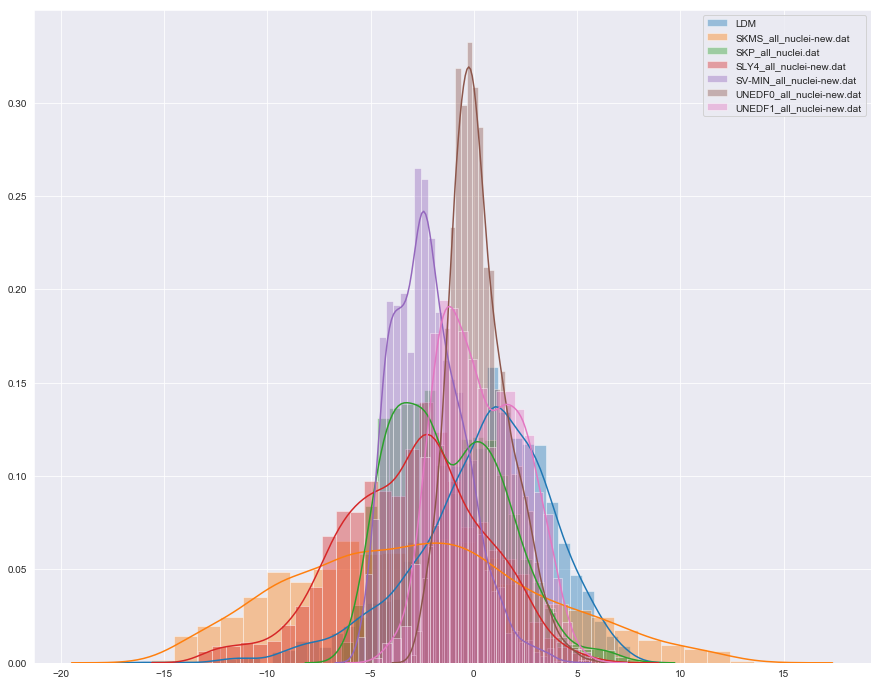

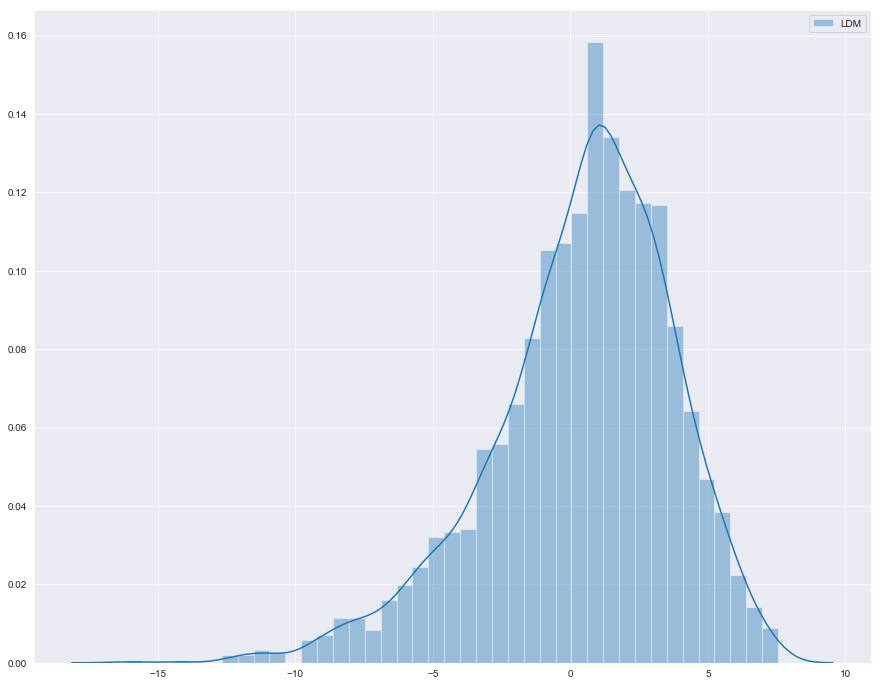

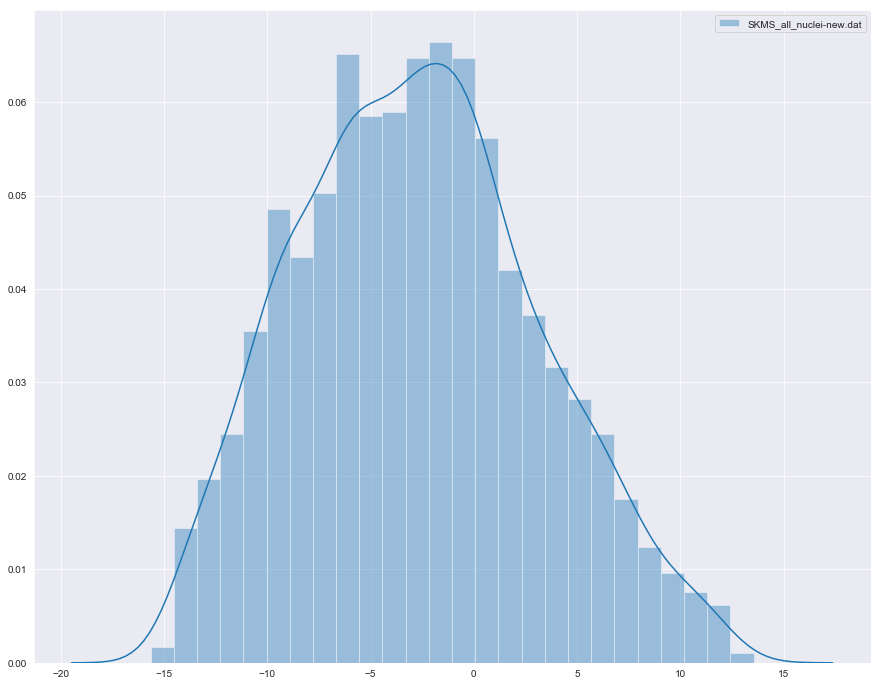

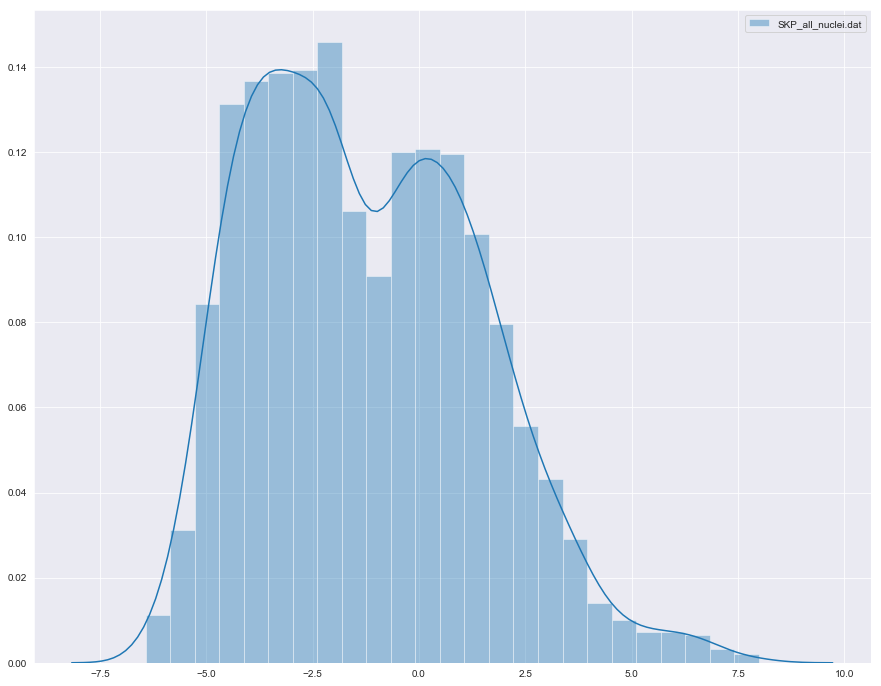

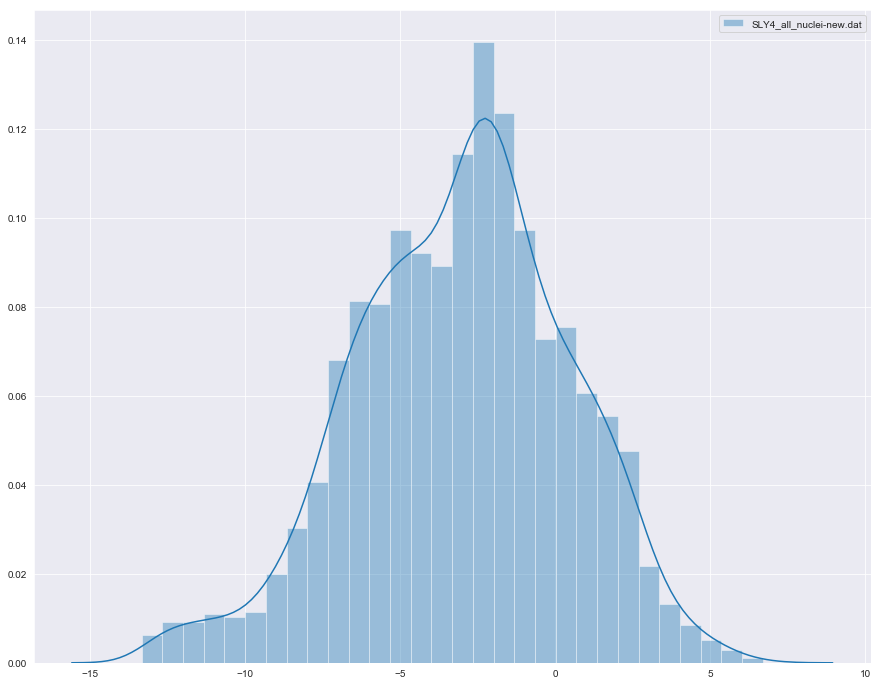

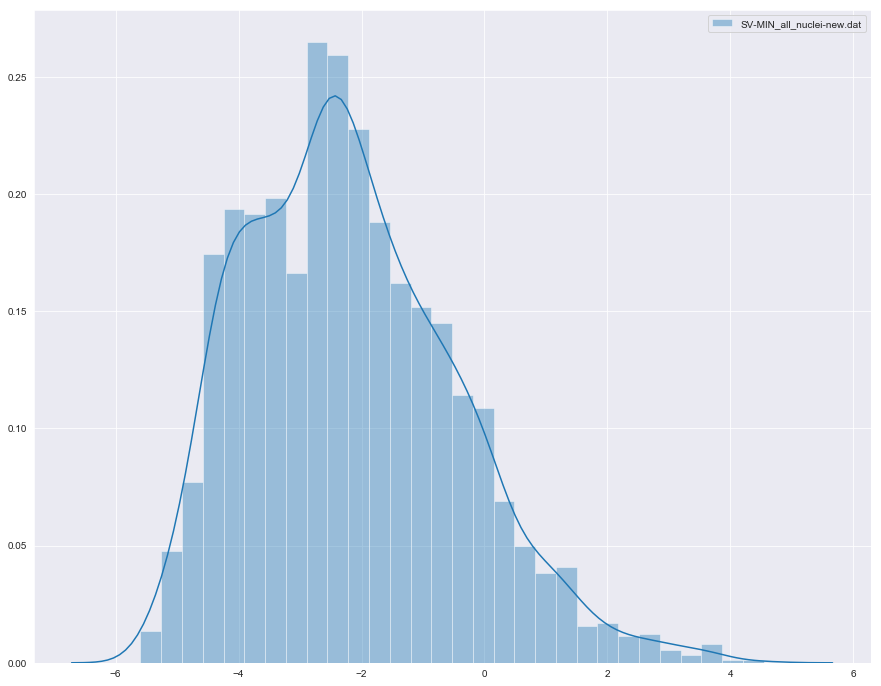

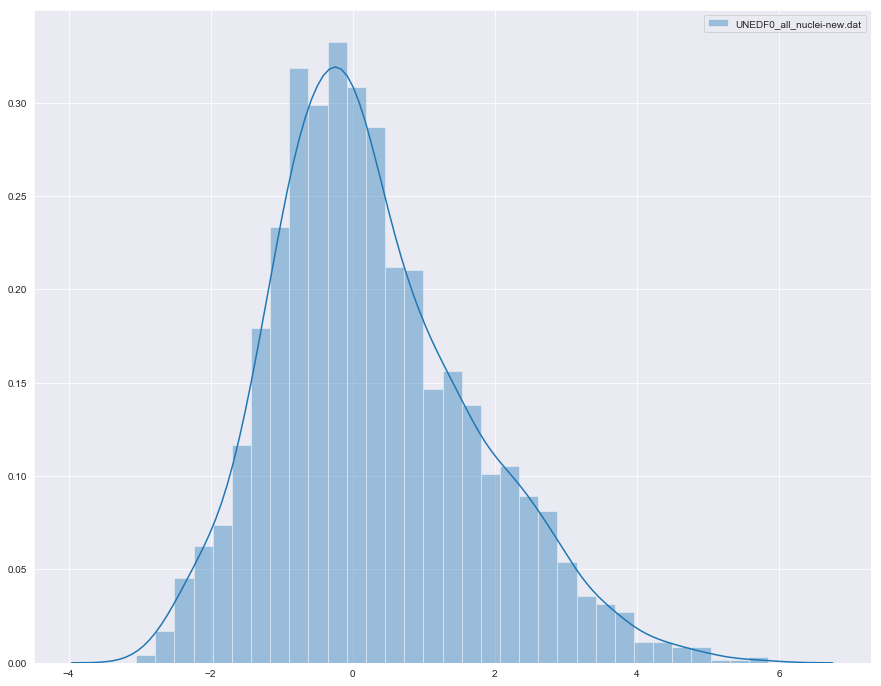

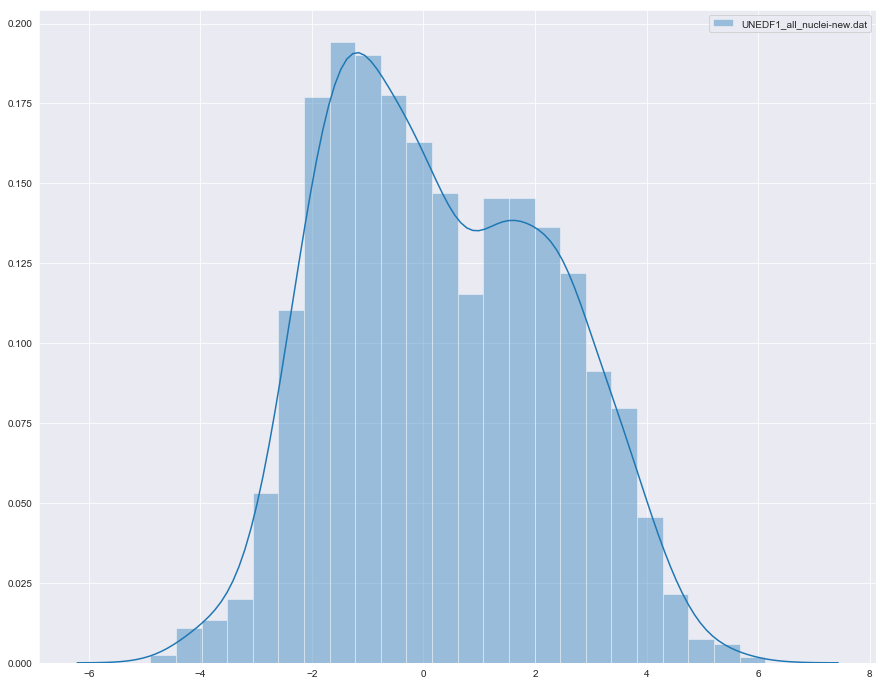

In [212]:
y=[]
for j in range(0, len(y_exp)):
    y.append(y_LDM[j]-y_exp[j])
    
sns.set_style('darkgrid')
sns.distplot(y, label='LDM')
plt.legend()


for i in range(0,6):
    y=[]
    for j in range(0, len(y_mat_the[i])):
        y.append(y_mat_the[i][j]-y_mat_exp[i][j])    
    sns.set_style('darkgrid')
    sns.distplot(y, label=names[i])
    plt.legend()
plt.show()    


y=[]
for j in range(0, len(y_exp)):
    y.append(y_LDM[j]-y_exp[j])
    
sns.set_style('darkgrid')
sns.distplot(y, label='LDM')
plt.legend()
plt.show()

for i in range(0,6):
    y=[]
    for j in range(0, len(y_mat_the[i])):
        y.append(y_mat_the[i][j]-y_mat_exp[i][j])    
    sns.set_style('darkgrid')
    sns.distplot(y, label=names[i])
    plt.legend()
    plt.show()
    
#rf with zn zq find delta 

In [213]:
y_nomat_the         =[[],[],[],[],[],[]]
ZN_y_nomat          =[[],[],[],[],[],[]]


for i in range(0,6):
    for ZN_the_i in ZN_the[i]:    
        try:
            test=y_exp_d[ZN_the_i[0],ZN_the_i[1]]
            
        except KeyError:
            try:
                y_nomat_the[i].append(y_the_d[i][ZN_the_i[0],ZN_the_i[1]])
                ZN_y_nomat[i].append(ZN_the_i)
            except KeyError:
                continue
        continue
            
for i in range(0,6):
    ZN_y_nomat[i]=np.transpose(ZN_y_nomat[i])
    

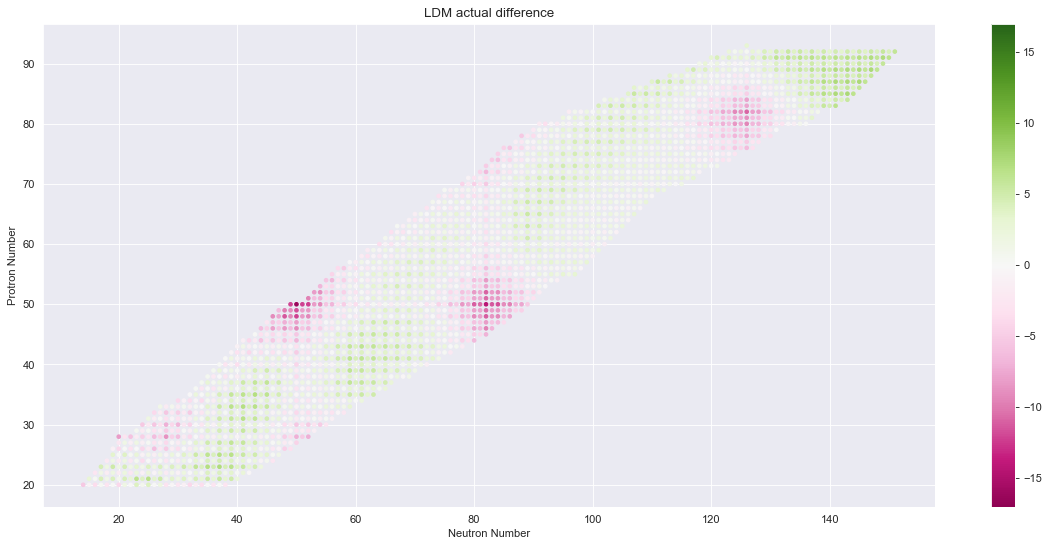

train score 0.9771491948243425
test score 0.8212523190357294
all score 0.9416543598539991
score 0.806949666727902


'\n   \next = np.int(np.ceil(max(-np.min(LDM_pred),np.max(LDM_pred))))\nfig=plt.figure(figsize=(18, 8), dpi= 80, facecolor=\'w\', edgecolor=\'k\')\nsc = plt.scatter(N_exp,Z_exp,c=LDM_pred,cmap=\'PiYG\',vmin=-ext,vmax=ext,s=10)\nplt.colorbar(sc)\nplt.title("LDM predicted Difference")\nplt.xlabel(\'Neutron Number\')\nplt.ylabel(\'Protron Number\')\nplt.show()\n\n\next = np.int(np.ceil(max(-np.min(LDM_pred-diff_LDM),np.max(LDM_pred-diff_LDM))))\nfig=plt.figure(figsize=(18, 8), dpi= 80, facecolor=\'w\', edgecolor=\'k\')\nsc = plt.scatter(N_exp,Z_exp,c=LDM_pred-diff_LDM,cmap=\'PiYG\',vmin=-ext,vmax=ext,s=10)\nplt.colorbar(sc)\nplt.title("LDM predicted Difference")\nplt.xlabel(\'Neutron Number\')\nplt.ylabel(\'Protron Number\')\nplt.show()\nprint()  \n'

In [9]:
diff_LDM=[]
for j in range(0, len(y_exp)):
    diff_LDM.append(y_LDM[j]-y_exp[j])
  
ext = np.int(np.ceil(max(-np.min(diff_LDM),np.max(diff_LDM))))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(N_exp,Z_exp,c=diff_LDM,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.title("LDM actual difference")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()

rf_LDM=RandomForestRegressor(n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(ZN_exp, diff_LDM, test_size =0.25) #, random_state=42 )
rf_LDM.fit(X_train,y_train)

LDM_pred=rf_LDM.predict(ZN_exp)

print("train score", rf_LDM.score(X_train,y_train))
print("test score", rf_LDM.score(X_test,y_test))
print("all score", rf_LDM.score(ZN_exp, diff_LDM))
print("score", ki(diff_LDM,LDM_pred))

LDM_score=rf_LDM.score(ZN_exp, diff_LDM)
LDM_sigma= ki(diff_LDM,LDM_pred)

"""
   
ext = np.int(np.ceil(max(-np.min(LDM_pred),np.max(LDM_pred))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=LDM_pred,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.title("LDM predicted Difference")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()


ext = np.int(np.ceil(max(-np.min(LDM_pred-diff_LDM),np.max(LDM_pred-diff_LDM))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=LDM_pred-diff_LDM,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.title("LDM predicted Difference")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()
print()  
"""
   

In [218]:
diff          =[ [], [], [], [], [], [] ]
rf_ZN_predict =[ [], [], [], [], [], [] ]

rf_ZN_sigma   =[ [], [], [], [], [], [] ]
rf_ZN_score   =[ [], [], [], [], [], [] ]


rf_ZN_name=["rf_ZN_SKMS",
         "rf_ZN_SKP",
         "rf_ZN_SLY4",
         "rf_ZN_SV-MIN",
         "rf_ZN_UNEDF0",
         "rf_ZN_UNEDF1",]

std_ZN        =[ [], [], [], [], [], [] ]
mean_ZN       =[ [], [], [], [], [], [] ]


for i in range(0,6):
    for j in range(0, len(y_mat_the[i])):
        diff[i].append(y_mat_the[i][j]-y_mat_exp[i][j])
    
    
    
    print(rf_ZN_name[i])
    rf_ZN_name[i]=RandomForestRegressor(n_estimators=1000)
    
    X_train, X_test, y_train, y_test = train_test_split(np.transpose(ZN_y_mat[i]), diff[i], test_size =0.05) #, random_state=42 )
    
    rf_ZN_name[i].fit(X_train,y_train)
    rf_ZN_predict[i]=rf_ZN_name[i].predict(np.transpose(ZN_y_mat[i]))
        
    
    """
    #Variance Examination
    for j in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(np.transpose(ZN_y_mat[i]), diff[i], test_size =0.25) #, random_state=42 )
        rf_ZN_name[i].fit(X_train,y_train)
    
        rf_ZN_predict[i]=rf_ZN_name[i].predict(np.transpose(ZN_y_mat[i]))
        std_ZN[i].append(np.std(  rf_ZN_predict[i]-diff[i]))
        mean_ZN[i].append(np.mean(rf_ZN_predict[i]-diff[i]))
    
    
    print("STD")
    print("std of STD: ",  np.std(std_ZN[i]))
    print("mean of STD: ", np.mean(std_ZN[i]), "\n")
    
    print("MEAN")
    print("std of MEAN: ",  np.std(mean_ZN[i]))
    print("mean of MEAN: ", np.mean(mean_ZN[i]), "\n")
    """
    
    
    rf_ZN_score[i] = rf_ZN_name[i].score(np.transpose(ZN_y_mat[i]), diff[i])
    rf_ZN_sigma[i] = ki(diff[i],rf_ZN_predict[i])
    
    print("SCORE")
    print("train score", rf_ZN_name[i].score(X_train,y_train))
    print("test score",  rf_ZN_name[i].score(X_test,y_test))
    print("all score",   rf_ZN_score[i])
          
    print("sigma", ki(diff[i],rf_ZN_predict[i]), "\n")
    
    
    
    #print("std: ", std_ZN[i], "\n")
    #print("mean: ", mean_ZN[i], "\n\n\n")

    
    """
    print("ACTUAL")
    ext = np.int(np.ceil(max(-np.min(diff[i]),np.max(diff[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(ZN_y_mat[i][1],ZN_y_mat[i][0],c=diff[i],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    print()
    
    
    
    print("PREDICTED")
    ext = np.int(np.ceil(max(-np.min(rf_ZN_predict[i]),np.max(rf_ZN_predict[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(ZN_y_mat[i][1],ZN_y_mat[i][0],c=rf_ZN_predict[i],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    
    print("PREDICTED-ACTUAL")
    ext = np.int(np.ceil(max(-np.min(rf_ZN_predict[i]-diff[i]),np.max(rf_ZN_predict[i]-diff[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(ZN_y_mat[i][1],ZN_y_mat[i][0],c=rf_ZN_predict[i]-diff[i],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    print()
    """
   
    

rf_ZN_SKMS
SCORE
train score 0.9994674578687207
test score 0.9954285588803325
all score 0.9992881776214804
sigma 0.1544463763341952 

rf_ZN_SKP
SCORE
train score 0.9981154471708498
test score 0.9885650561906029
all score 0.9976206273557733
sigma 0.12878171528697083 

rf_ZN_SLY4
SCORE
train score 0.9988111639327736
test score 0.9919475226141136
all score 0.9984883823682507
sigma 0.13310211921682577 

rf_ZN_SV-MIN
SCORE
train score 0.9961228744354984
test score 0.9691099833504802
all score 0.9947998767587799
sigma 0.12268637588402098 

rf_ZN_UNEDF0
SCORE
train score 0.9942141201192245
test score 0.964404372773625
all score 0.9928554631872493
sigma 0.12035041445610119 

rf_ZN_UNEDF1
SCORE
train score 0.9974233387164911
test score 0.9801293880815374
all score 0.9965327848906527
sigma 0.11710875687883393 



In [266]:
rf_ZQ_name=["rf_ZQ_SKMS",
         "rf_ZQ_SKP",
         "rf_ZQ_SLY4",
         "rf_ZQ_SV-MIN",
         "rf_ZQ_UNEDF0",
         "rf_ZQ_UNEDF1",]

rf_ZQ_predict =[ [], [], [], [], [], [] ]

rf_ZQ_sigma   =[ [], [], [], [], [], [] ]
rf_ZQ_score   =[ [], [], [], [], [], [] ]

std_ZQ        =[ [], [], [], [], [], [] ]
mean_ZQ       =[ [], [], [], [], [], [] ]
    
for i in range(0,6):
    print(rf_ZQ_name[i])
    rf_ZQ_name[i]=RandomForestRegressor(n_estimators=1000)
    
    X_train, X_test, y_train, y_test = train_test_split(ZQ_mat[i], diff[i], test_size =0.05)#, random_state=42 )
    
    rf_ZQ_name[i].fit(X_train,y_train) 
    
    rf_ZQ_predict[i]=rf_ZQ_name[i].predict(ZQ_mat[i])
        
    
    """
    Variance Examination
    for j in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(ZQ_mat[i], diff[i], test_size =0.25)#, random_state=42 )
        rf_ZQ_name[i].fit(X_train,y_train)
        
        rf_ZQ_predict[i]=rf_ZQ_name[i].predict(ZQ_mat[i])
        #print(rf_ZQ_name[i])
        #print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        #print(rf_ZQ_name[i].score(X_train,y_train))
        #print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    
        std_ZQ[i].append(np.std(  rf_ZQ_predict[i]-diff[i]))
        mean_ZQ[i].append(np.mean(rf_ZQ_predict[i]-diff[i]))
    
    print("STD")
    print("std of STD: ",  np.std(std_ZQ[i]))
    print("mean of STD: ", np.mean(std_ZQ[i]), "\n")
    
    print("MEAN")
    print("std of MEAN: ",  np.std(mean_ZQ[i]))
    print("mean of MEAN: ", np.mean(mean_ZQ[i]), "\n")
    
    
    print("std: ", std_ZQ[i], "\n")
    print("mean: ", mean_ZQ[i], "\n\n\n")
    
    """ 
    
    rf_ZQ_score[i] =rf_ZQ_name[i].score(ZQ_mat[i], diff[i])
    rf_ZQ_sigma[i] =ki(diff[i],rf_ZQ_predict[i])
    
    print("SCORE")
    print("train score", rf_ZQ_name[i].score(X_train,y_train))
    print("test score", rf_ZQ_name[i].score(X_test,y_test))
    print("all score", rf_ZQ_score[i])
    print("sigma", ki(diff[i],rf_ZQ_predict[i]), '\n')
    
    
    #print("train score: ", rf_ZQ_name[i].score(X_train,y_train))
    #print("test  score: ", rf_ZQ_name[i].score(X_test,y_test))
      
    
      
    
   

rf_ZQ_SKMS
SCORE
train score 0.9777719769266011
test score 0.8307454701956117
all score 0.9697265041372284
sigma 1.0072173350792477 

rf_ZQ_SKP
SCORE
train score 0.980712179325661
test score 0.8306664824070497
all score 0.9727492860435092
sigma 0.43582477614773985 

rf_ZQ_SLY4
SCORE
train score 0.9712820658769973
test score 0.8286022358696377
all score 0.9640604222644056
sigma 0.6490086436136803 

rf_ZQ_SV-MIN
SCORE
train score 0.964135997062743
test score 0.6947313211404398
all score 0.9491647187676713
sigma 0.38359429083424657 

rf_ZQ_UNEDF0
SCORE
train score 0.9455814525594274
test score 0.6355171377433615
all score 0.9252337236665543
sigma 0.389326017082201 

rf_ZQ_UNEDF1
SCORE
train score 0.953463463378423
test score 0.6814721968135341
all score 0.9402721033946932
sigma 0.4860574319992925 



SKMS_all_nuclei-new.dat
sigma 1.0046620650462932 

ACTUAL


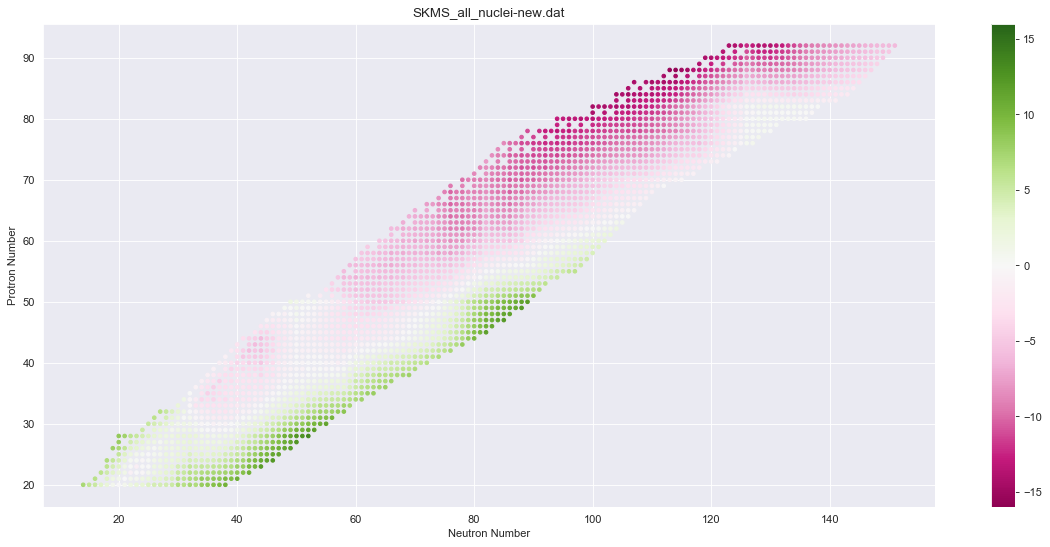




SKP_all_nuclei.dat
sigma 0.4253720951288911 

ACTUAL


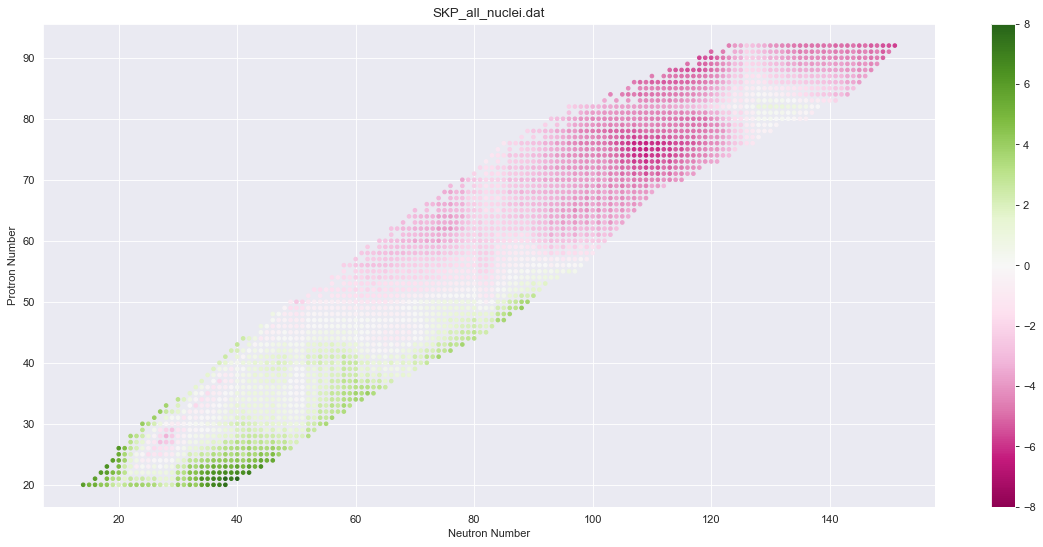




SLY4_all_nuclei-new.dat
sigma 0.683048998404842 

ACTUAL


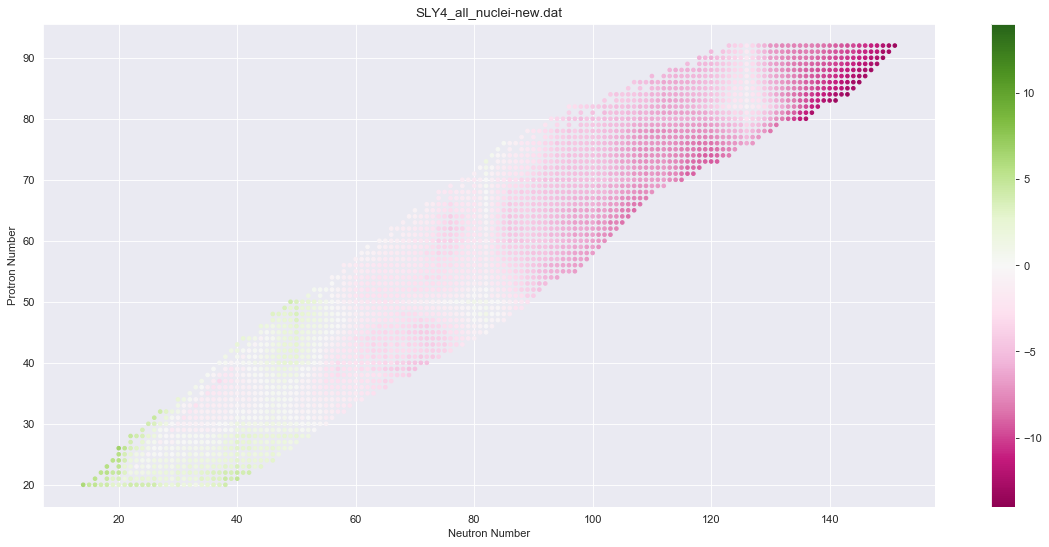




SV-MIN_all_nuclei-new.dat
sigma 0.36747581264208 

ACTUAL


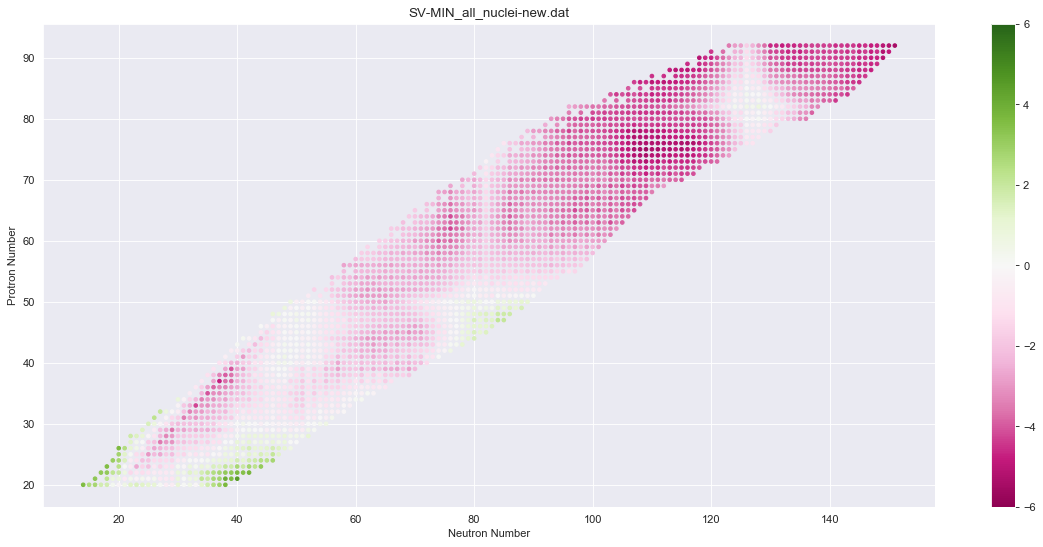




UNEDF0_all_nuclei-new.dat
sigma 0.3774644815920036 

ACTUAL


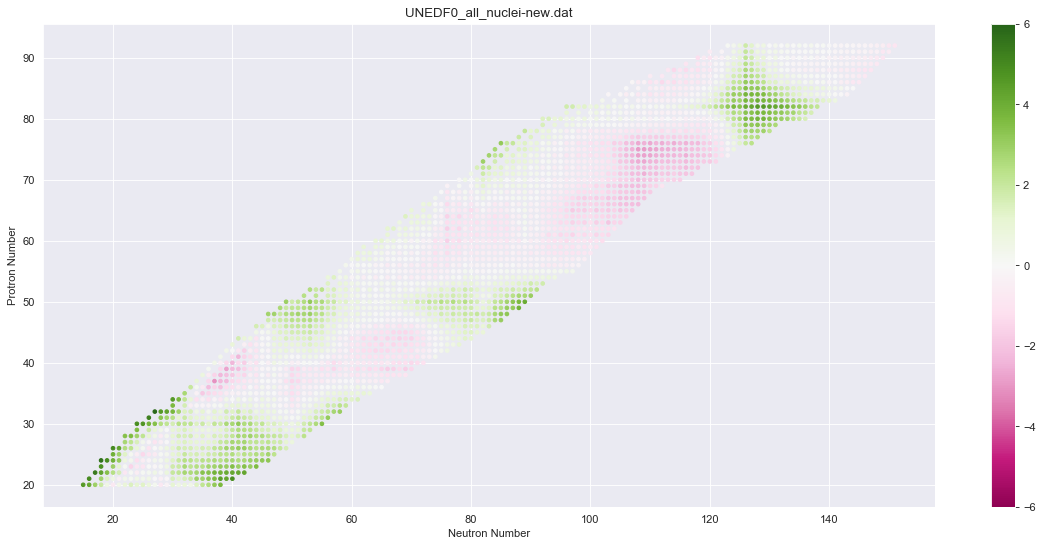




UNEDF1_all_nuclei-new.dat
sigma 0.4929575678407268 

ACTUAL


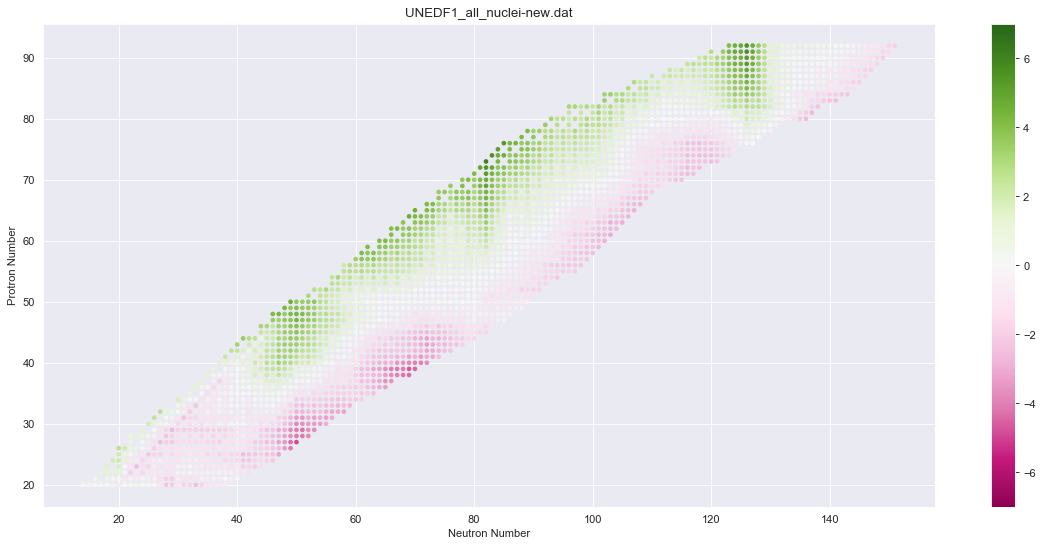

In [231]:
 
for i in range(0,6):
   
    print(names[i])
    #print("train score", rf_ZQ_name[i].score(X_train,y_train))
    #print("test score", rf_ZQ_name[i].score(X_test,y_test))
    #print("all score", rf_ZQ_name[i].score(ZQ_mat[i], diff[i]))
    print("sigma", ki(diff[i],rf_ZQ_predict[i]), '\n')
    
    
    #rf_ZQ_score[i] =rf_ZQ_name[i].score(ZQ_mat[i], diff[i])
    rf_ZQ_sigma[i] =ki(diff[i],rf_ZQ_predict[i])
    
    
    
    print("ACTUAL")
    ext = np.int(np.ceil(max(-np.min(diff[i]),np.max(diff[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(ZN_y_mat[i][1],ZN_y_mat[i][0],c=diff[i],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    
    """
    print("PREDICTED")
    ext = np.int(np.ceil(max(-np.min(rf_ZQ_predict[i]),np.max(rf_ZQ_predict[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(ZN_y_mat[i][1],ZN_y_mat[i][0],c=rf_ZQ_predict[i],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    
    
    
    print("PREDICTED and ACTUAL DIFFERENCE")
    ext = np.int(np.ceil(max(-np.min(rf_ZQ_predict[i]-diff[i]),np.max(rf_ZQ_predict[i]-diff[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(ZN_y_mat[i][1],ZN_y_mat[i][0],c=rf_ZQ_predict[i]-diff[i],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    """
    
    
    print()
    print()
    print()
 

    

In [233]:
for i in range(0,6):   
    print(names[i])
    
    improvement= (sigma[i]-rf_ZQ_sigma[i])/sigma[i]
    
    print("  sigma              |   rf_ZN_sigma          |  rf_ZQ_sigma              |  improvement of ZQ")  
    print(sigma[i], "      ",  rf_ZN_sigma[i], "      ",  rf_ZQ_sigma[i], "      ",  improvement, '\n\n')

for i in range(0,6):
    print(names[i])
    print("ZN score: ", rf_ZN_score[i])
    print("ZQ score: ", rf_ZQ_score[i], "\n")
    
    
    
print()
print()
print("ZN LDM_score: ", LDM_score)
print("ZN LDM_sigma: ", LDM_sigma)

SKMS_all_nuclei-new.dat
  sigma              |   rf_ZN_sigma          |  rf_ZQ_sigma              |  improvement of ZQ
6.395698570629776        0.1544463763341952        1.0046620650462932        0.8429159764251732 


SKP_all_nuclei.dat
  sigma              |   rf_ZN_sigma          |  rf_ZQ_sigma              |  improvement of ZQ
2.912195286502078        0.12878171528697083        0.4253720951288911        0.8539342134435572 


SLY4_all_nuclei-new.dat
  sigma              |   rf_ZN_sigma          |  rf_ZQ_sigma              |  improvement of ZQ
4.571176105719517        0.13310211921682577        0.683048998404842        0.850574779311127 


SV-MIN_all_nuclei-new.dat
  sigma              |   rf_ZN_sigma          |  rf_ZQ_sigma              |  improvement of ZQ
2.7671814634361946        0.12268637588402098        0.36747581264208        0.8672021269664908 


UNEDF0_all_nuclei-new.dat
  sigma              |   rf_ZN_sigma          |  rf_ZQ_sigma              |  improvement of ZQ
1.45215534

In [234]:
"""

"""

for i in range(0,6):
    X_the[i]=np.transpose(X_the[i])
    print("i: ", i)
    print("np.shape(X_the[i]):    ", np.shape(X_the[i]))
    print("X_the[i][0]:           ", X_the[i][0])
    print("X_the[i][1]:           ", X_the[i][1])
    
    print("X_the[i][2]:           ", X_the[i][2])
    """
    print("X_the[i][3]:           ", X_the[i][3])
    print("X_the[i][4]:           ", X_the[i][4])
    print("X_the[i][5]:           ", X_the[i][5])
    print("X_the[i][6]:           ", X_the[i][6])
    print("X_the[i][7]:           ", X_the[i][7])
    print("X_the[i][8]:           ", X_the[i][8], "\n")
    #print("X_the[i][1]:           ", X_the[i][9], "\n")
    """

    print("X_the[i][0]:           ", len(X_the[i][0]))
    print("X_the[i][1]:           ", len(X_the[i][1]))
    print("X_the[i][1]:           ", len(X_the[i][2]), "\n")
    
    print("X_the[i][0][0]:           ", X_the[i][0][0])
    print("X_the[i][1][0]:           ", X_the[i][1][0])
    print("X_the[i][2][0]:           ", X_the[i][2][0], "\n")
    
    print("X_the[i][0][1]:           ", X_the[i][0][1])
    print("X_the[i][1][1]:           ", X_the[i][1][1])
    print("X_the[i][1][1]:           ", X_the[i][2][1], "\n\n\n")
    

i:  0
np.shape(X_the[i]):     (9, 5259)
X_the[i][0]:            [20. 20. 20. ... 92. 92. 92.]
X_the[i][1]:            [ 14.  15.  16. ... 218. 220. 222.]
X_the[i][2]:            [ 34.  35.  36. ... 310. 312. 314.]
X_the[i][0]:            5259
X_the[i][1]:            5259
X_the[i][1]:            5259 

X_the[i][0][0]:            20.0
X_the[i][1][0]:            14.0
X_the[i][2][0]:            34.0 

X_the[i][0][1]:            20.0
X_the[i][1][1]:            15.0
X_the[i][1][1]:            35.0 



i:  1
np.shape(X_the[i]):     (9, 4673)
X_the[i][0]:            [20. 20. 20. ... 92. 92. 92.]
X_the[i][1]:            [ 14.  15.  16. ... 206. 208. 210.]
X_the[i][2]:            [ 34.  35.  36. ... 298. 300. 302.]
X_the[i][0]:            4673
X_the[i][1]:            4673
X_the[i][1]:            4673 

X_the[i][0][0]:            20.0
X_the[i][1][0]:            14.0
X_the[i][2][0]:            34.0 

X_the[i][0][1]:            20.0
X_the[i][1][1]:            15.0
X_the[i][1][1]:            35.0 



In [235]:
#          1   2   3   4   5   6
S_n_ml  = [[], [], [], [], [], []]
ZN_ml   = [[], [], [], [], [], []]
j=0
for X_the_i in X_the:    
    print("!!!!!!!!!!!!!!!!!!!!!!!!")
    print("!!!!!!!!!!!!!!!!!!!!!!!!")
    print("!!!!!!!!!!!!!!!!!!!!!!!!")
    print(names[j])
    print("!!!!!!!!!!!!!!!!!!!!!!!!")
    print("!!!!!!!!!!!!!!!!!!!!!!!!")
    print("!!!!!!!!!!!!!!!!!!!!!!!!")
    
    for i in range(1, len(np.transpose(X_the[j]))):
        if X_the_i[1][i]-1 == X_the_i[1][i-1]:
            """
            print("length:                    ", len(np.transpose(X_the[j]))  )
            print("i:                         ", i)
            print("j:                         ", j)
            print("z last:                    ",  X_the_i[0][i-1])
            print("n last:                    ",  X_the_i[1][i-1])
            print("Q last:                    ",  X_the_i[8][i-1])
            print("y last:                    ",  X_the_i[3][i-1], "\n")
        
            print("z:                         ",  X_the_i[0][i])
            print("n:                         ",  X_the_i[1][i])
            print("Q:                         ",  X_the_i[8][i])
            print("y current:                 ",  X_the_i[3][i], "\n")    
            print("rf prediction last:        ", rf_ZQ_name[j].predict([[X_the_i[0][i-1],  X_the_i[8][i-1]]]))
            print("rf prediction:             ", rf_ZQ_name[j].predict([[X_the_i[0][i],  X_the_i[8][i]]]))
            print("rf difference:             ", rf_ZQ_name[j].predict([[X_the_i[0][i],  X_the_i[8][i]]])-rf_ZQ_name[j].predict([[X_the_i[0][i-1],  X_the_i[8][i-1]]]))
            """
            y_curr=X_the_i[3][i]   + rf_ZQ_name[j].predict([[X_the_i[0][i],    X_the_i[8][i]]]  )
            y_last=X_the_i[3][i-1] + rf_ZQ_name[j].predict([[X_the_i[0][i-1],  X_the_i[8][i-1]]])
            
            ZN_ml[j].append([X_the_i[0][i], X_the_i[1][i]])
            
            
            sep_sub=y_curr-y_last
            
            sep_sub=np.transpose(y_curr-y_last)
            
            S_n_ml[j].append(sep_sub.astype(np.float))
            
            """
            print("S_n + ml:                  ", y_curr-y_last, "\n")
            
            
            
        
            print("S_n:                       ",  X_the_i[3][i]-X_the_i[3][i-1])
            print("S_n given:                 ",  -X_the_i[5][i])
            print("S_p given:                 ",  X_the_i[4][i])
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! \n")
            """
        else:
            """
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("N was not 1 apart")
            print("i:                         ", i)
            print("j:                         ", j)
            print("z last:                    ",  X_the_i[0][i-1])
            print("n last:                    ",  X_the_i[1][i-1])
            print("Q last:                    ",  X_the_i[8][i-1])
            print("y last:                    ",  X_the_i[3][i-1], "\n")
        
            print("z:                         ",  X_the_i[0][i])
            print("n:                         ",  X_the_i[1][i])
            print("Q:                         ",  X_the_i[8][i])
            print("y current:                 ",  X_the_i[3][i], "\n")    
            """
    j=j+1
    
         

    

!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!
SKMS_all_nuclei-new.dat
!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!


KeyboardInterrupt: 

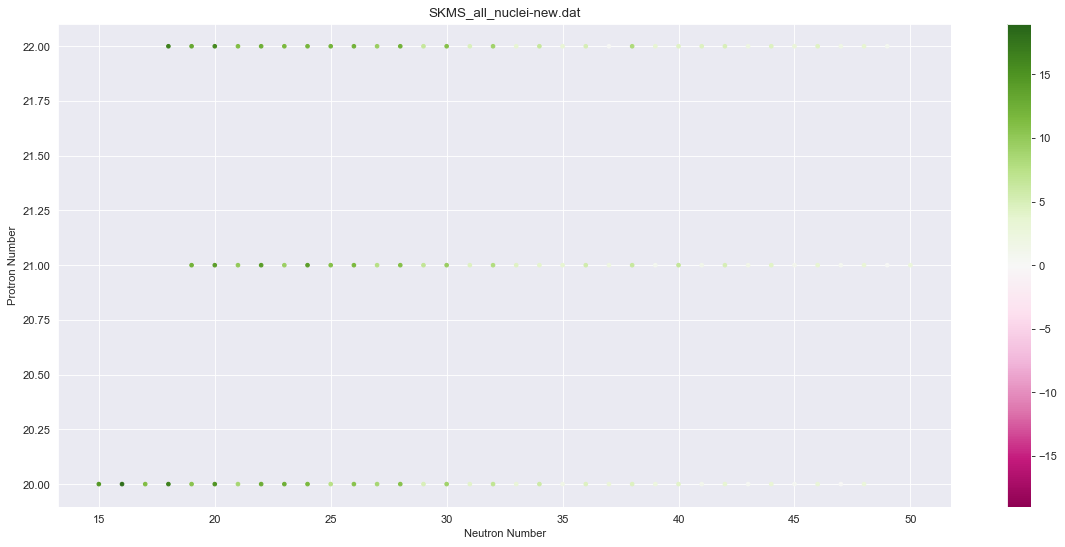

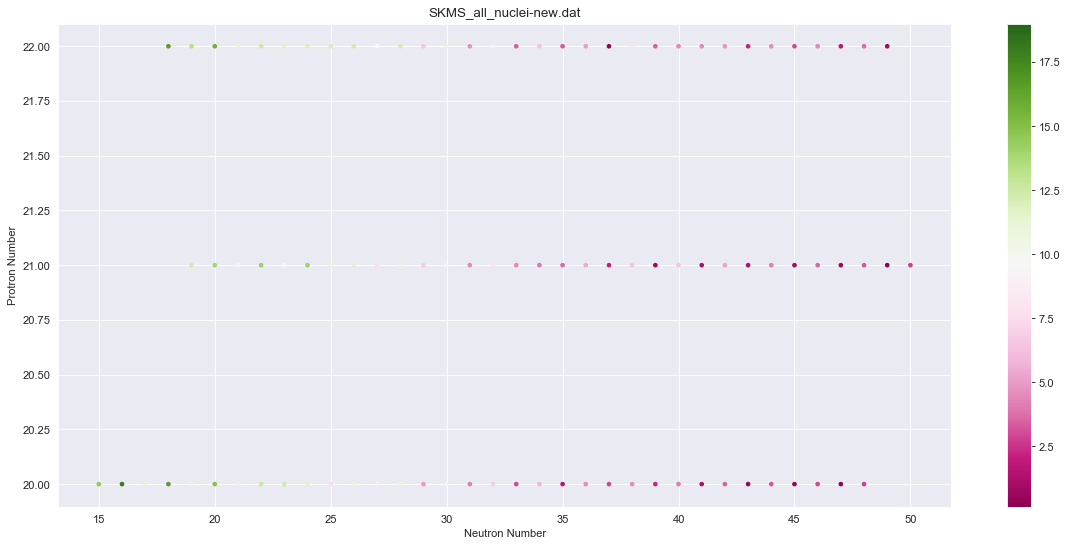

IndexError: index 0 is out of bounds for axis 0 with size 0

In [18]:
for i in range(0,6):
    #print(np.shape(S_n_ml[i]))
    #print(np.shape(np.transpose(ZN_ml[i])[0]))
    #print(np.shape(np.transpose(ZN_ml[i])[1]), "\n")
    #print(S_n_ml[i], "\n")
    #print(np.transpose(S_n_ml[i]), "\n")
    #print(np.transpose(S_n_ml[i])[0], "\n")
    #print(np.transpose(S_n_ml[i])[0][1], "\n")
    ext = np.int(np.ceil(max(-np.min(np.transpose(S_n_ml[i])[0]),np.max(np.transpose(S_n_ml[i])[0]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(ZN_ml[i])[1],np.transpose(ZN_ml[i])[0],c=np.transpose(S_n_ml[i])[0],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    ext = np.int(np.ceil(max(np.transpose(S_n_ml[i])[0])))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(ZN_ml[i])[1],np.transpose(ZN_ml[i])[0],c=np.transpose(S_n_ml[i])[0],cmap='PiYG',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    
    
    """
    print("PREDICTED")
    ext = np.int(np.ceil(max(-np.min(rf_ZQ_predict[i]),np.max(rf_ZQ_predict[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(ZN_y_mat[i][1],ZN_y_mat[i][0],c=rf_ZQ_predict[i],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    """    

(5259,)
Looking for S_n under 0 of given theoretical models
 S_n_w_ml


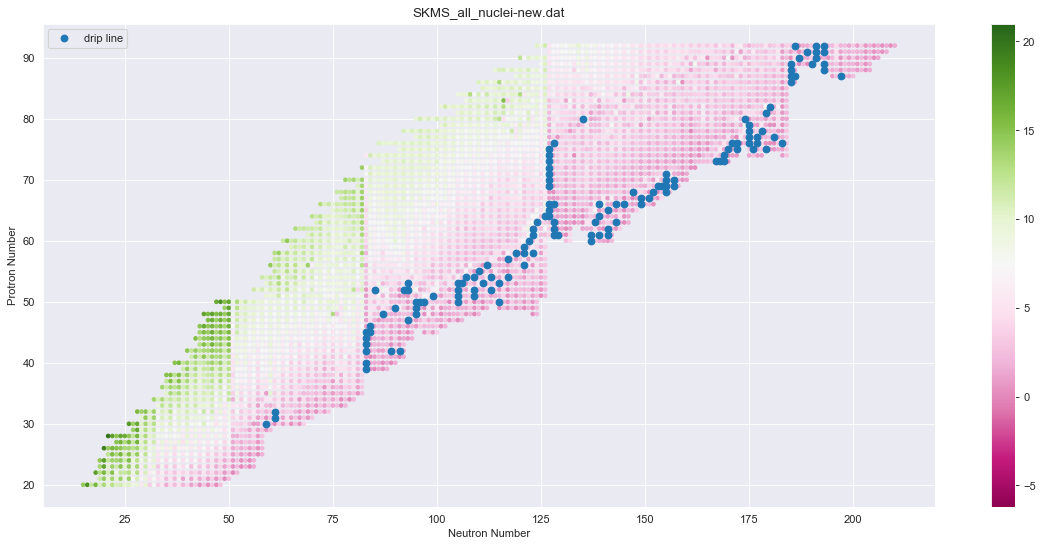

(4673,)
Looking for S_n under 0 of given theoretical models
 S_n_w_ml


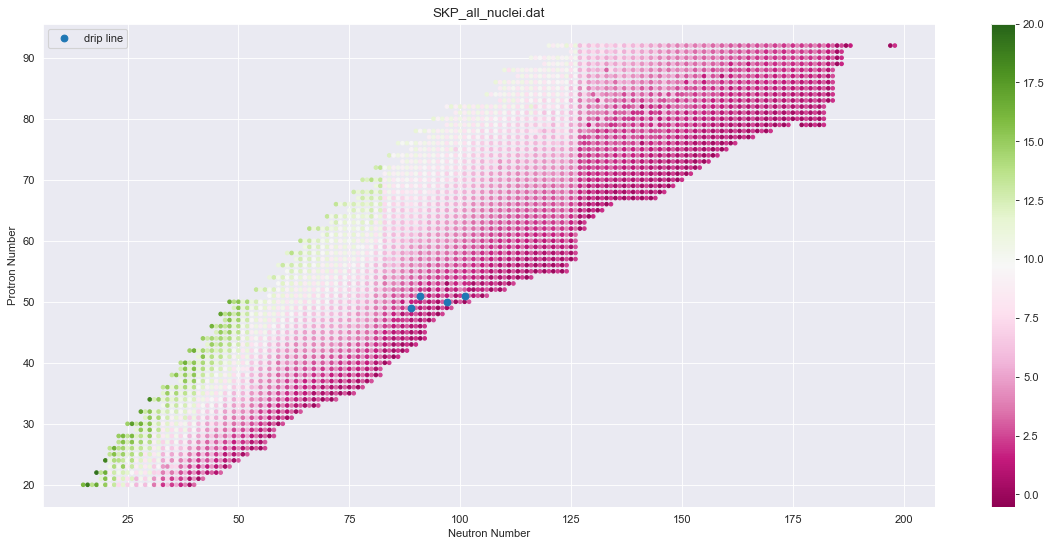

(4519,)
Looking for S_n under 0 of given theoretical models
 S_n_w_ml


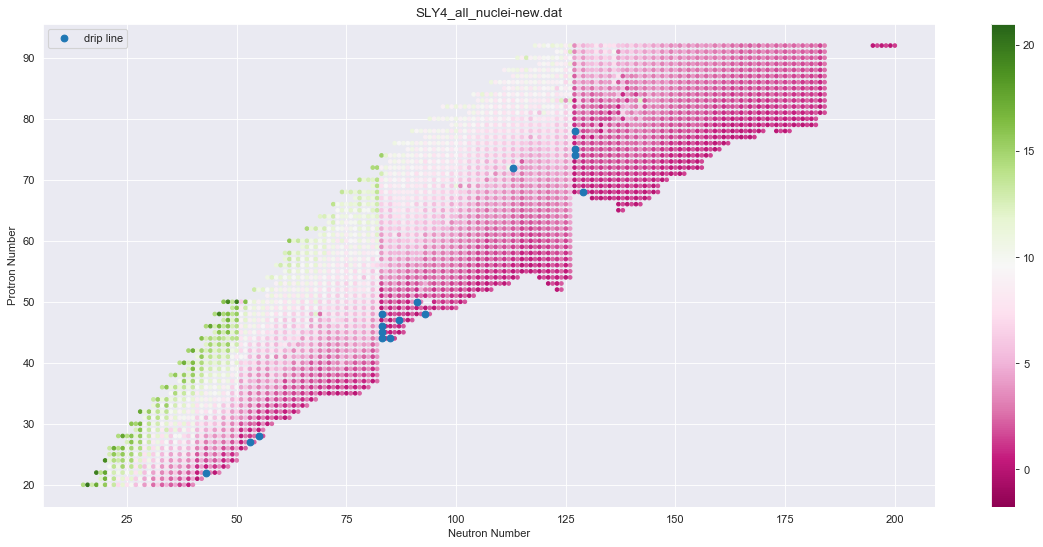

(4860,)
Looking for S_n under 0 of given theoretical models
 S_n_w_ml


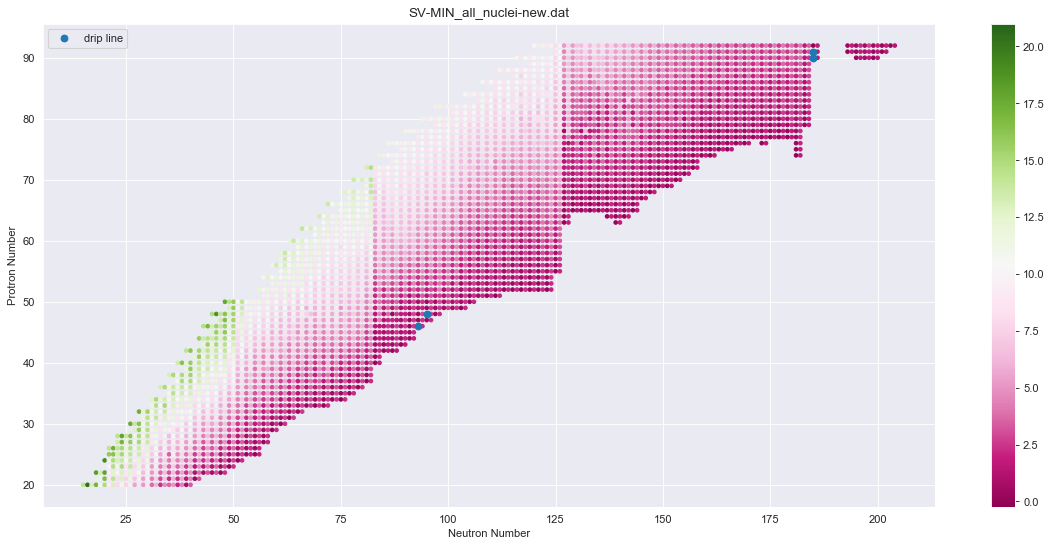

(5091,)
Looking for S_n under 0 of given theoretical models
 S_n_w_ml


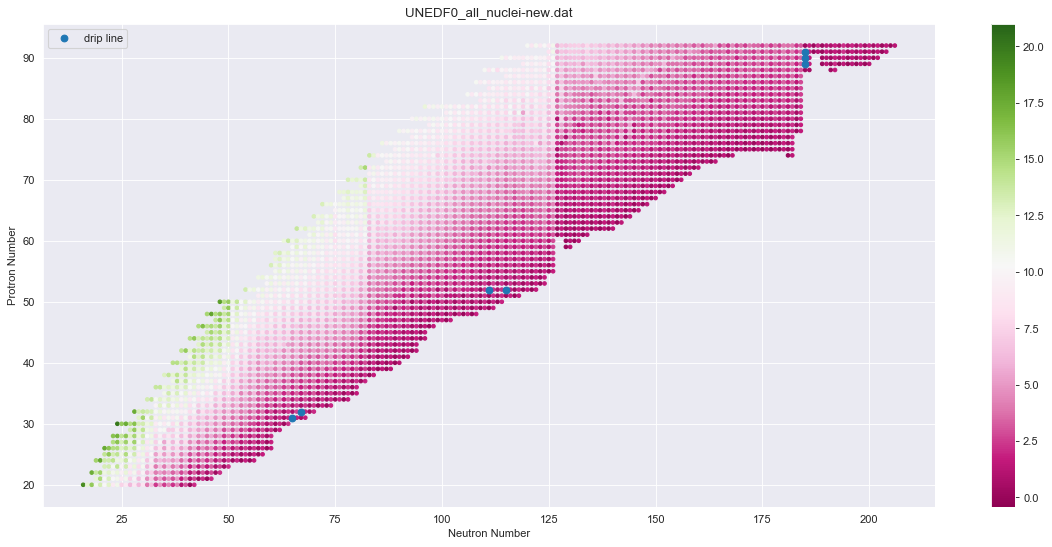

(5013,)
Looking for S_n under 0 of given theoretical models
 S_n_w_ml


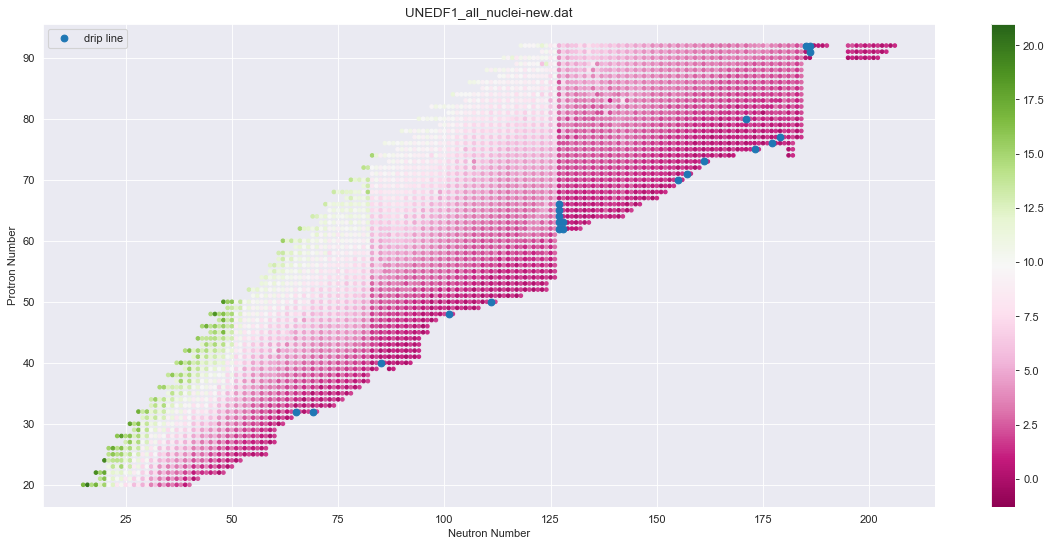

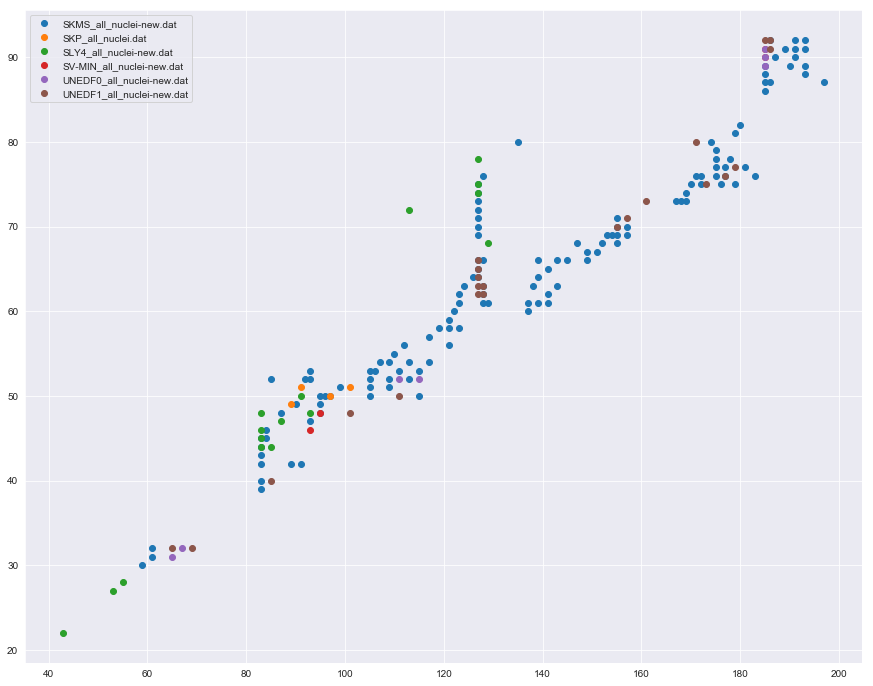

In [236]:
ml_component=[ [], [], [], [], [], [] ]
y_w_ml      =[ [], [], [], [], [], [] ]
y_w_ml_d    =[ {}, {}, {}, {}, {}, {} ]      


S_n_w_ml    =[ [], [], [], [], [], [] ]
Z_of_S_n    =[ [], [], [], [], [], [] ]
N_of_S_n    =[ [], [], [], [], [], [] ]

Drip_w_ml   =[ [], [], [], [], [], [] ]
Z_of_Drip   =[ [], [], [], [], [], [] ]
N_of_Drip   =[ [], [], [], [], [], [] ]


for i in range(0,6):
    ZQ_sub=np.transpose(np.stack( (X_the[i][0],X_the[i][8])))
    ml_component[i]=rf_ZQ_name[i].predict(ZQ_sub)
    y_w_ml[i]=X_the[i][3]+ml_component[i]
    
    
    print(np.shape(y_w_ml[i]))
    for j in range(0, len(y_w_ml[i])):
        #print("X_the[i][0][j]:  ", X_the[i][0][j],      "  X_the[i][1][j]: ", X_the[i][1][j])
        #print("ml_component[i]: ", ml_component[i][j],  "  y_the:          ", y_the[i][j])
        
        y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]]= y_w_ml[i][j]
        
        #print("y_w_ml:          ", y_w_ml[i][j])
        #print("y_w_ml_d:        ", y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]], "\n")
        
        if j>0 and X_the[i][1][j-1]==X_the[i][1][j]-1:
            try:
                #print("last n:      ", y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j-1]])
                #print("current n:   ", y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]], "\n")
                S_n_w_ml[i].append(y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]]-y_w_ml_d[i][X_the[i][0][j-1], X_the[i][1][j-1]])
                Z_of_S_n[i].append(X_the[i][0][j])
                N_of_S_n[i].append(X_the[i][1][j])
                
                S_n_w_ml_curr=y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]] - y_w_ml_d[i][ X_the[i][0][j-1], X_the[i][1][j-1]]
                """
                print("X_the[i][0][j-1]:                                  ", X_the[i][0][j-1])
                print("X_the[i][1][j-1]:                                  ", X_the[i][1][j-1])
                
                print("y_the[i][j-1]:                                     ", y_the[i][j-1])
                print("X_the[i][5][j-1]:                                  ", X_the[i][5][j-1])
                
                print("ml_component[i-1]:                                 ", ml_component[i][j-1])
                print("y_w_ml[i][j-1]:                                    ", y_w_ml[i][j-1])
                print("y_w_ml_d[i][X_the[i][0][j-1], X_the[i][1][j-1]]:   ", y_w_ml_d[i][X_the[i][0][j-1], X_the[i][1][j-1]])
                
                
                
                print("X_the[i][0][j]:                                    ", X_the[i][0][j])
                print("X_the[i][1][j]:                                    ", X_the[i][1][j])
                
                print("y_the[i][j]:                                       ", y_the[i][j])
                print("X_the[i][5][j]:                                    ", y_the[i][j])
                
                print("ml_component[i]:                                   ", ml_component[i][j])
                print("y_w_ml[i][j]:                                      ", y_w_ml[i][j])
                print("y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]]:       ", y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]], "\n")
                print("S_n_w_ml_curr:                                     ", S_n_w_ml_curr, "\n")
                """
                if S_n_w_ml_curr<0:
                    #print("Z: ", X_the[i][0][j])
                    #print("N: ", X_the[i][1][j])
                    #print("Drip: ", S_n_w_ml_curr)
                    
                    Drip_w_ml[i].append(S_n_w_ml_curr)
                    Z_of_Drip[i].append(X_the[i][0][j])
                    N_of_Drip[i].append(X_the[i][1][j])
                    
            
            except KeyError:
                continue
            
        
         
    
    #for j in range(1, len(X_the[i])):
    #    if X_the[i][1][j]-1 == X_the[i][1][j-1]:
    #        S_n_w_ml[i].append(y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]]-y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j-1]])
            
    #print("S_n_w_ml[i][j]: ", S_n_w_ml[i])
            
    #print(Drip_w_ml[i])
    #print(Z_of_Drip[i])
    #print(N_of_Drip[i])
    print("Looking for S_n under 0 of given theoretical models")
    #for j in range(0, len(X_the[i][5])):
    #    if -X_the[i][5][j]<=0:
            #print("Z,N: ", X_the[i][0][j], X_the[i][0][j])
            #print("S_n: ", -X_the[i][5][j])
            
    #print("Looking for S_n under 0 of given theoretical models+ ml component")
    #for j in range(0, len(S_n_w_ml[i])):
    #    if S_n_w_ml[i][j]<=0:
            #print("Z,N: ", Z_of_S_n[i][j], N_of_S_n[i][j])
            #print("S_n: ", S_n_w_ml[i][j])
            
    
            
    """
            
    print( " S_n_given")
    ext = np.int(np.ceil(max(-X_the[i][5])))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(X_the[i][1],X_the[i][0],c=-X_the[i][5],cmap='PiYG',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    """
    
    print(" S_n_w_ml")
    ext = np.int(np.ceil(max(S_n_w_ml[i])))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(N_of_S_n[i],Z_of_S_n[i],c=S_n_w_ml[i],cmap='PiYG',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.plot(N_of_Drip[i], Z_of_Drip[i], "o", label="drip line")
    plt.title(names[i])
    plt.legend()
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    #for j in range(0, len(S_n_w_ml[i])):
    #    if S_n_w_ml[i]!=np.transpose(S_n_ml[i])[0][j]:
    #        print(S_n_w_ml[i], "and", np.transpose(S_n_ml[i])[0][j])
    """
    
    print("Differently calculated")
    ext = np.int(np.ceil(max(np.transpose(S_n_ml[i])[0])))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(ZN_ml[i])[1],np.transpose(ZN_ml[i])[0],c=np.transpose(S_n_ml[i])[0],cmap='PiYG',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    
    """
    
    
    """
    print( " S_n_given")
    ext = np.int(np.ceil(max(-np.min(-X_the[i][5]),np.max(-X_the[i][5]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(X_the[i][1],X_the[i][0],c=-X_the[i][5],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    """
    
for i in range(0,6):        
    plt.plot(N_of_Drip[i], Z_of_Drip[i], "o", label=names[i])

plt.legend()
plt.show()
        
    
            
                
     

                

  

the std and mean of each nucleon with and without ml of the binding Energies. 
sighn up for presentation
right abstract

(5259,)
 S_n_w_ml


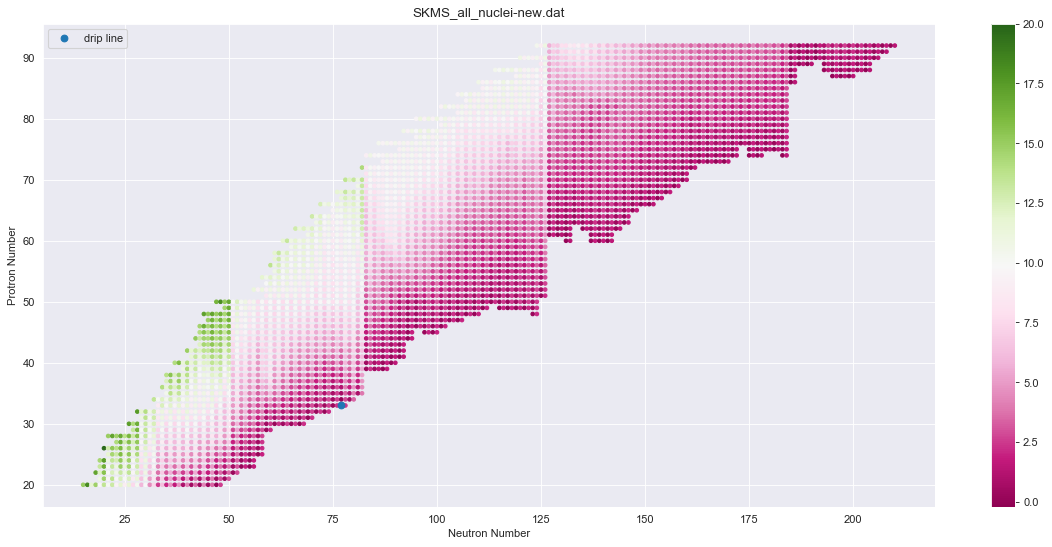

(4673,)
 S_n_w_ml


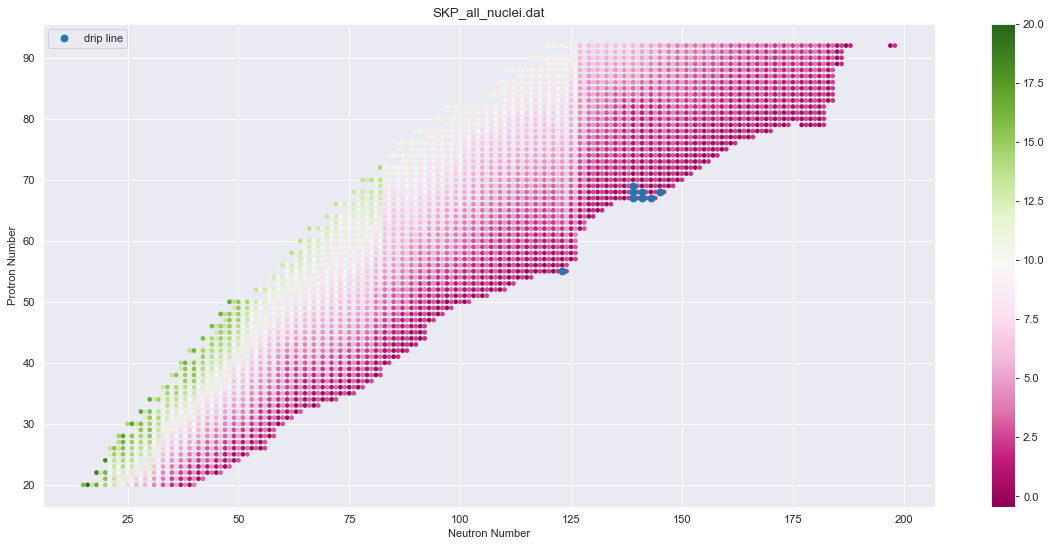

(4519,)
 S_n_w_ml


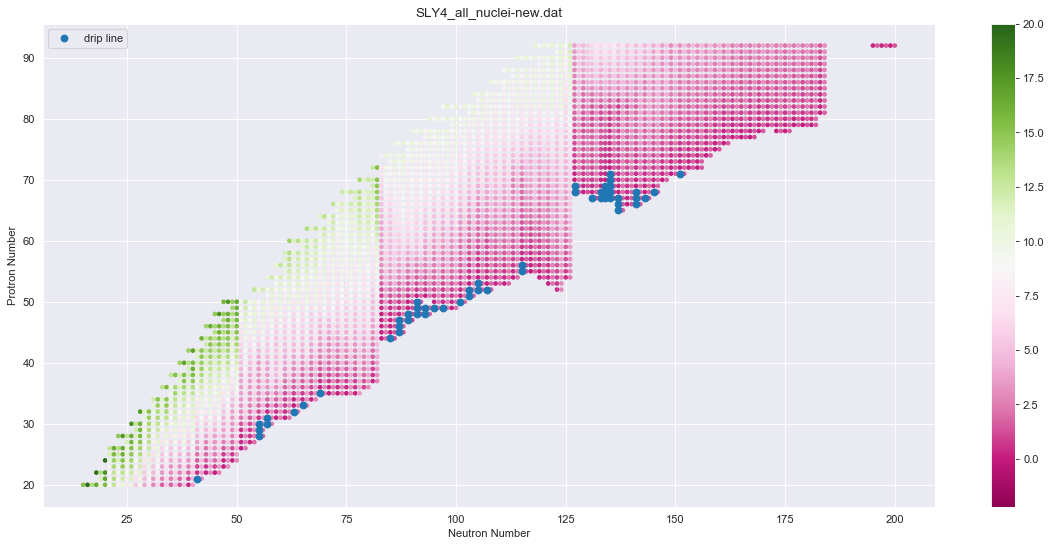

(4860,)
 S_n_w_ml


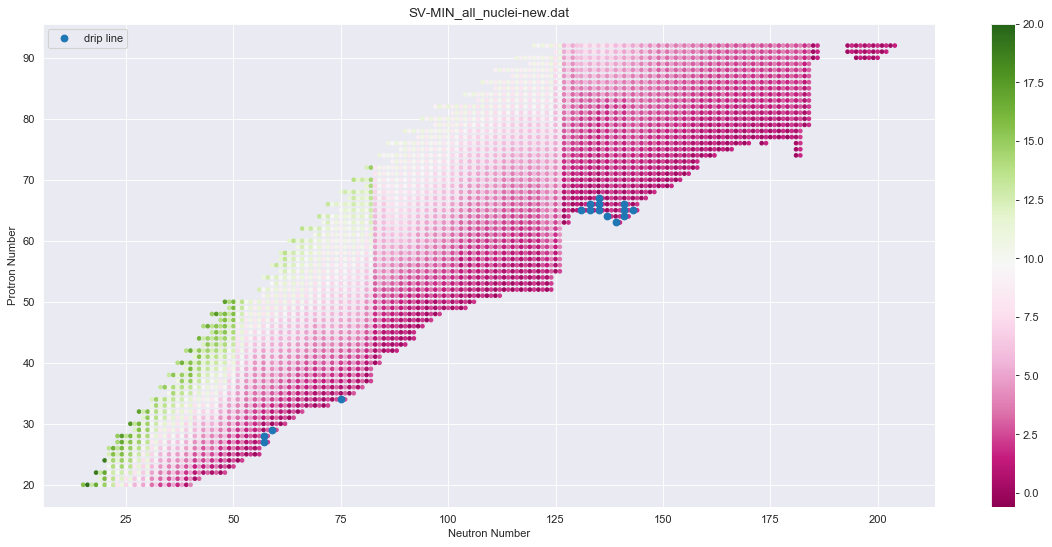

(5091,)
 S_n_w_ml


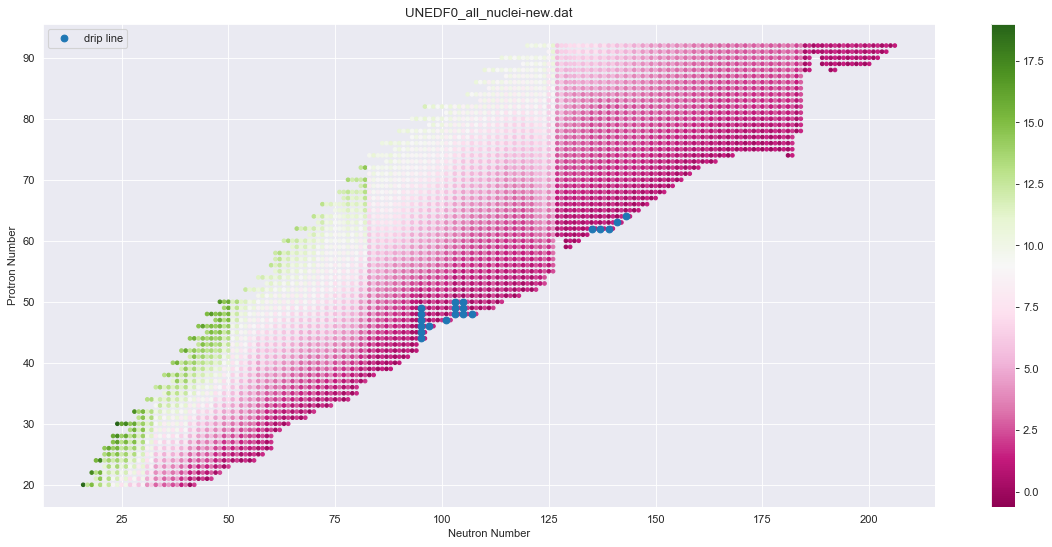

(5013,)
 S_n_w_ml


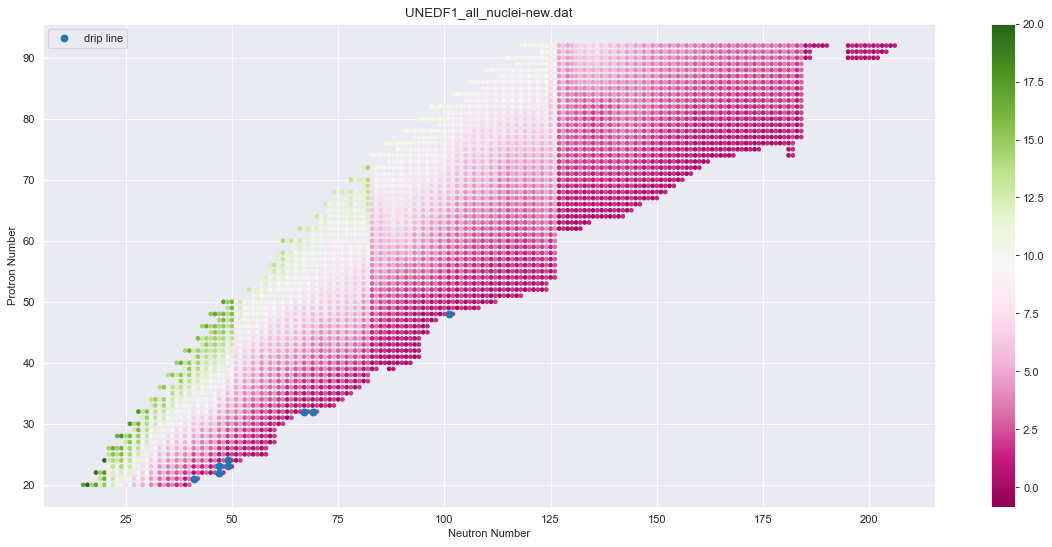

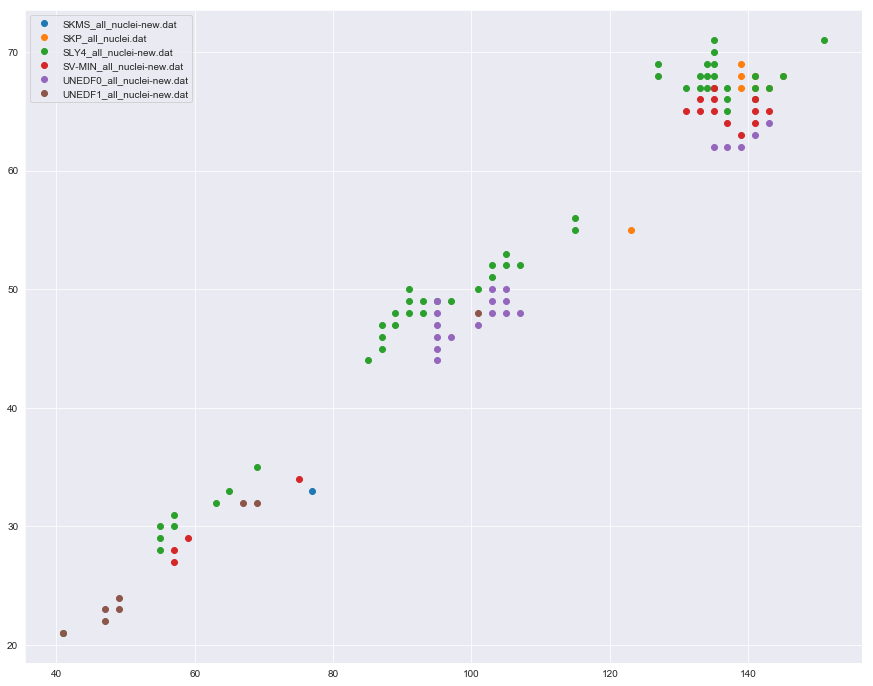

In [237]:
ml_component=[ [], [], [], [], [], [] ]
y_w_ml      =[ [], [], [], [], [], [] ]
y_w_ml_d    =[ {}, {}, {}, {}, {}, {} ]      


S_n_w_ml    =[ [], [], [], [], [], [] ]
Z_of_S_n    =[ [], [], [], [], [], [] ]
N_of_S_n    =[ [], [], [], [], [], [] ]

Drip_w_ml   =[ [], [], [], [], [], [] ]
Z_of_Drip   =[ [], [], [], [], [], [] ]
N_of_Drip   =[ [], [], [], [], [], [] ]


for i in range(0,6):
    ZQ_sub=np.transpose(np.stack( (X_the[i][0],X_the[i][1])))
    ml_component[i]=rf_ZN_name[i].predict(ZQ_sub)
    y_w_ml[i]=X_the[i][3]+ml_component[i]
    
    
    print(np.shape(y_w_ml[i]))
    for j in range(0, len(y_w_ml[i])):
        #print("X_the[i][0][j]:  ", X_the[i][0][j],      "  X_the[i][1][j]: ", X_the[i][1][j])
        #print("ml_component[i]: ", ml_component[i][j],  "  y_the:          ", y_the[i][j])
        
        y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]]= y_w_ml[i][j]
        
        #print("y_w_ml:          ", y_w_ml[i][j])
        #print("y_w_ml_d:        ", y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]], "\n")
        
        if j>0 and X_the[i][1][j-1]==X_the[i][1][j]-1:
            try:
                #print("last n:      ", y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j-1]])
                #print("current n:   ", y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]], "\n")
                S_n_w_ml[i].append(y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]]-y_w_ml_d[i][X_the[i][0][j-1], X_the[i][1][j-1]])
                Z_of_S_n[i].append(X_the[i][0][j])
                N_of_S_n[i].append(X_the[i][1][j])
                
                S_n_w_ml_curr=y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]] - y_w_ml_d[i][ X_the[i][0][j-1], X_the[i][1][j-1]]
                """
                print("X_the[i][0][j-1]:                                  ", X_the[i][0][j-1])
                print("X_the[i][1][j-1]:                                  ", X_the[i][1][j-1])
                
                print("y_the[i][j-1]:                                     ", y_the[i][j-1])
                print("X_the[i][5][j-1]:                                  ", X_the[i][5][j-1])
                
                print("ml_component[i-1]:                                 ", ml_component[i][j-1])
                print("y_w_ml[i][j-1]:                                    ", y_w_ml[i][j-1])
                print("y_w_ml_d[i][X_the[i][0][j-1], X_the[i][1][j-1]]:   ", y_w_ml_d[i][X_the[i][0][j-1], X_the[i][1][j-1]])
                
                
                
                print("X_the[i][0][j]:                                    ", X_the[i][0][j])
                print("X_the[i][1][j]:                                    ", X_the[i][1][j])
                
                print("y_the[i][j]:                                       ", y_the[i][j])
                print("X_the[i][5][j]:                                    ", y_the[i][j])
                
                print("ml_component[i]:                                   ", ml_component[i][j])
                print("y_w_ml[i][j]:                                      ", y_w_ml[i][j])
                print("y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]]:       ", y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]], "\n")
                print("S_n_w_ml_curr:                                     ", S_n_w_ml_curr, "\n")
                """
                if S_n_w_ml_curr<0:
                    #print("Z: ", X_the[i][0][j])
                    #print("N: ", X_the[i][1][j])
                    #print("Drip: ", S_n_w_ml_curr)
                    
                    Drip_w_ml[i].append(S_n_w_ml_curr)
                    Z_of_Drip[i].append(X_the[i][0][j])
                    N_of_Drip[i].append(X_the[i][1][j])
                    
            
            except KeyError:
                continue
            
        
         
    
    #for j in range(1, len(X_the[i])):
    #    if X_the[i][1][j]-1 == X_the[i][1][j-1]:
    #        S_n_w_ml[i].append(y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j]]-y_w_ml_d[i][X_the[i][0][j], X_the[i][1][j-1]])
            
    #print("S_n_w_ml[i][j]: ", S_n_w_ml[i])
            
    #print(Drip_w_ml[i])
    #print(Z_of_Drip[i])
    #print(N_of_Drip[i])
    """
    
    print( " S_n_given")
    ext = np.int(np.ceil(max(-X_the[i][5])))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(X_the[i][1],X_the[i][0],c=-X_the[i][5],cmap='PiYG',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    """
    
    print(" S_n_w_ml")
    ext = np.int(np.ceil(max(S_n_w_ml[i])))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(N_of_S_n[i],Z_of_S_n[i],c=S_n_w_ml[i],cmap='PiYG',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.plot(N_of_Drip[i], Z_of_Drip[i], "o", label="drip line")
    plt.title(names[i])
    plt.legend()
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    """
    
    print("Differently calculated")
    ext = np.int(np.ceil(max(np.transpose(S_n_ml[i])[0])))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(ZN_ml[i])[1],np.transpose(ZN_ml[i])[0],c=np.transpose(S_n_ml[i])[0],cmap='PiYG',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    """
    
for i in range(0,6):        
    plt.plot(N_of_Drip[i], Z_of_Drip[i], "o", label=names[i])

plt.legend()
plt.show()

    

In [167]:
for i in range(0,6):
    X_the[i]=sorted(X_the[i], key=itemgetter(1))
    
        


In [168]:
for i in range(0,6):
    print(X_the[i][0], "\n")
    print(X_the[i][1], "\n")
    
    #print(X_the[i][0][4],"\n")
    
    print("(Z,N,y, S_p):", X_the[i][0][0],X_the[i][0][1], X_the[i][0][3], X_the[i][0][4], "\n", )
    print("(Z,N,y, S_p):", X_the[i][1][0],X_the[i][1][1], X_the[i][1][3], X_the[i][1][4], "\n", )
    
    print("(Z,N,y, S_p):", X_the[i][2][0],X_the[i][0][1], X_the[i][0][3], X_the[i][0][4], "\n", )
    print("(Z,N,y, S_p):", X_the[i][3][0],X_the[i][1][1], X_the[i][1][3], X_the[i][1][4], "\n", )
   
    print("(Z,N,y, S_p):", X_the[i][4][0],X_the[i][0][1], X_the[i][0][3], X_the[i][0][4], "\n", )
    print("(Z,N,y, S_p):", X_the[i][5][0],X_the[i][1][1], X_the[i][1][3], X_the[i][1][4], "\n", )
   
   

[ 2.00000000e+01  1.40000000e+01  3.40000000e+01  2.52133057e+02
 -1.48703200e+00 -2.21114800e+01 -1.83160000e-02 -4.09485690e+01
  8.70180500e+00] 

[ 20.        15.        35.       267.741621  -2.468973 -15.608564
  -2.020035 -37.720044   7.480085] 

(Z,N,y, S_p): 20.0 14.0 252.133057 -1.487032 

(Z,N,y, S_p): 20.0 15.0 267.741621 -2.468973 

(Z,N,y, S_p): 20.0 14.0 252.133057 -1.487032 

(Z,N,y, S_p): 21.0 15.0 267.741621 -2.468973 

(Z,N,y, S_p): 20.0 14.0 252.133057 -1.487032 

(Z,N,y, S_p): 22.0 15.0 267.741621 -2.468973 

[ 2.0000000e+01  1.4000000e+01  3.4000000e+01  2.5088820e+02
 -1.7040690e+00 -2.2266272e+01 -1.8898700e-01 -4.1162739e+01
  8.7676840e+00] 

[ 20.        15.        35.       267.087205  -2.225064 -16.199005
  -1.280152 -38.465277   7.131568] 

(Z,N,y, S_p): 20.0 14.0 250.8882 -1.704069 

(Z,N,y, S_p): 20.0 15.0 267.087205 -2.225064 

(Z,N,y, S_p): 20.0 14.0 250.8882 -1.704069 

(Z,N,y, S_p): 21.0 15.0 267.087205 -2.225064 

(Z,N,y, S_p): 20.0 14.0 250.8882 -1

In [268]:
rf_NQ_name=["rf_NQ_SKMS",
         "rf_NQ_SKP",
         "rf_NQ_SLY4",
         "rf_NQ_SV-MIN",
         "rf_NQ_UNEDF0",
         "rf_NQ_UNEDF1",]

rf_NQ_predict =[ [], [], [], [], [], [] ]

rf_NQ_sigma   =[ [], [], [], [], [], [] ]
rf_NQ_score   =[ [], [], [], [], [], [] ]

std_NQ        =[ [], [], [], [], [], [] ]
mean_NQ       =[ [], [], [], [], [], [] ]
    
for i in range(0,6):
    print(rf_NQ_name[i])
    rf_NQ_name[i]=RandomForestRegressor(n_estimators=1000)
    
    X_train, X_test, y_train, y_test = train_test_split(NQ_mat[i], diff[i], test_size =0.05)#, random_state=42 )
    
    rf_NQ_name[i].fit(X_train,y_train) 
    85
    rf_NQ_predict[i]=rf_NQ_name[i].predict(NQ_mat[i])
        
    
    """
    Variance Examination
    for j in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(ZQ_mat[i], diff[i], test_size =0.25)#, random_state=42 )
        rf_ZQ_name[i].fit(X_train,y_train)
        
        rf_ZQ_predict[i]=rf_ZQ_name[i].predict(ZQ_mat[i])
        #print(rf_ZQ_name[i])
        #print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        #print(rf_ZQ_name[i].score(X_train,y_train))
        #print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    
        std_ZQ[i].append(np.std(  rf_ZQ_predict[i]-diff[i]))
        mean_ZQ[i].append(np.mean(rf_ZQ_predict[i]-diff[i]))
    
    print("STD")
    print("std of STD: ",  np.std(std_ZQ[i]))
    print("mean of STD: ", np.mean(std_ZQ[i]), "\n")
    
    print("MEAN")
    print("std of MEAN: ",  np.std(mean_ZQ[i]))
    print("mean of MEAN: ", np.mean(mean_ZQ[i]), "\n")
    
    
    print("std: ", std_ZQ[i], "\n")
    print("mean: ", mean_ZQ[i], "\n\n\n")
    
    """ 
    
    rf_NQ_score[i] =rf_NQ_name[i].score(NQ_mat[i], diff[i])
    rf_NQ_sigma[i] =ki(diff[i],rf_NQ_predict[i])
    
    print("SCORE")
    print("train score", rf_NQ_name[i].score(X_train,y_train))
    print("test score", rf_NQ_name[i].score(X_test,y_test))
    print("all score", rf_NQ_score[i])
    print("sigma", ki(diff[i],rf_NQ_predict[i]), '\n')
    
    
    #print("train score: ", rf_ZQ_name[i].score(X_train,y_train))
    #print("test  score: ", rf_ZQ_name[i].score(X_test,y_test))
      
    
      
    
   

rf_NQ_SKMS
SCORE
train score 0.9935678597431898
test score 0.9532167123834827
all score 0.9918564369354341
sigma 0.522395150321768 

rf_NQ_SKP
SCORE
train score 0.9934625697139357
test score 0.9678011885564421
all score 0.9922469840035611
sigma 0.23246539534972413 

rf_NQ_SLY4
SCORE
train score 0.9961385255114902
test score 0.9735955203186809
all score 0.9949563075922698
sigma 0.24312985567909975 

rf_NQ_SV-MIN
SCORE
train score 0.990171603962402
test score 0.9169795267679877
all score 0.9855939050108233
sigma 0.2042032531657309 

rf_NQ_UNEDF0
SCORE
train score 0.9805852184503635
test score 0.871693576119582
all score 0.9754039983724202
sigma 0.2233021001483112 

rf_NQ_UNEDF1
SCORE
train score 0.9923702367441688
test score 0.9462473154150335
all score 0.9896984291058081
sigma 0.20186020291173684 



In [284]:
Z_all_mat          =[]
N_all_mat          =[]
y_all_mat          =[[],[],[],[],[],[]]
Q_all_mat          =[[],[],[],[],[],[]]

y_all_mat_d        =[{},{},{},{},{},{}]
Q_all_mat_d        =[{},{},{},{},{},{}]

y_std_all_mat      =[]
y_mean_all_mat     =[]

for z in range(19,120):
    for n in range(10, 200):
        try:
            sub=[]
            
            test=y_the_d[0][z,n]
            test=y_the_d[1][z,n]
            test=y_the_d[2][z,n]
            test=y_the_d[3][z,n]
            test=y_the_d[4][z,n]
            test=y_the_d[5][z,n]
            test=y_exp_d[z,n]
            
            y_all_mat[0].append(y_the_d[0][z,n])
            y_all_mat_d[0][z,n]=y_the_d[0][z,n]
            
            Q_all_mat[0].append(Q_the_d[0][z,n])
            Q_all_mat_d[0][z,n]=Q_the_d[0][z,n]
            
            sub.append(y_the_d[0][z,n])
            
            y_all_mat[1].append(y_the_d[1][z,n])
            y_all_mat_d[1][z,n]=y_the_d[1][z,n]
            
            Q_all_mat[1].append(Q_the_d[1][z,n])
            Q_all_mat_d[1][z,n]=Q_the_d[1][z,n]
            
            sub.append(y_the_d[1][z,n])
            
            y_all_mat[2].append(y_the_d[2][z,n])
            y_all_mat_d[2][z,n]=y_the_d[2][z,n]
            
            Q_all_mat[2].append(Q_the_d[2][z,n])
            Q_all_mat_d[2][z,n]=Q_the_d[2][z,n]
            
            sub.append(y_the_d[2][z,n])
            
            y_all_mat[3].append(y_the_d[3][z,n])
            y_all_mat_d[3][z,n]=y_the_d[3][z,n]
            
            Q_all_mat[3].append(Q_the_d[3][z,n])
            Q_all_mat_d[3][z,n]=Q_the_d[3][z,n]
            
            sub.append(y_the_d[3][z,n])
            
            y_all_mat[4].append(y_the_d[4][z,n])
            y_all_mat_d[4][z,n]=y_the_d[4][z,n]
            
            Q_all_mat[4].append(Q_the_d[4][z,n])
            Q_all_mat_d[4][z,n]=Q_the_d[4][z,n]
            
            sub.append(y_the_d[4][z,n])
            
            y_all_mat[5].append(y_the_d[5][z,n])
            y_all_mat_d[5][z,n]=y_the_d[5][z,n]
            
            Q_all_mat[5].append(Q_the_d[5][z,n])
            Q_all_mat_d[5][z,n]=Q_the_d[5][z,n]
            
            sub.append(y_the_d[5][z,n])
            
            y_std_all_mat.append( np.std(sub))
            y_mean_all_mat.append(np.mean(sub))
            
            
            Z_all_mat.append(z)
            N_all_mat.append(n)
            
            
        except KeyError:
            continue
            
y_all_mat_w_ml          =[[],[],[],[],[],[]]
y_std_all_mat_w_ml      =[]
y_mean_all_mat_w_ml     =[]



ml_comp                 =[[],[],[],[],[],[]]
ml_comp_mean            =[]
ml_comp_std             =[]


for i in range(0,6):
    sub=np.transpose(np.stack( (Z_all_mat,Q_all_mat[i])  ))
    ml_comp[i]=rf_ZQ_name[i].predict(sub)
    
    y_all_mat_w_ml[i]=y_all_mat[i]+ml_comp[i]
    
    
    
y_all_mat_w_ml=np.transpose(y_all_mat_w_ml)
ml_comp=np.transpose(ml_comp)

for y_all_mat_w_ml_i in y_all_mat_w_ml:
    
    y_std_all_mat_w_ml.append(np.std(y_all_mat_w_ml_i))
    y_mean_all_mat_w_ml.append(np.mean(y_all_mat_w_ml_i))

for ml_comp_i in ml_comp:
    ml_comp_mean.append(np.mean(ml_comp_i))
    ml_comp_std.append(np.std(ml_comp_i))
    
y_all_mat_w_ml=np.transpose(y_all_mat_w_ml)
ml_comp=np.transpose(ml_comp)




y_all_mat_w_ml_NQ          =[[],[],[],[],[],[]]
y_std_all_mat_w_ml_NQ      =[]
y_mean_all_mat_w_ml_NQ     =[]

for i in range(0,6):
    sub=np.transpose(np.stack( (N_all_mat,Q_all_mat[i])  ))
    ml_comp=rf_NQ_name[i].predict(sub)
    
    y_all_mat_w_ml_NQ[i]=y_all_mat[i]+ml_comp
    
y_all_mat_w_ml_NQ=np.transpose(y_all_mat_w_ml_NQ)



for y_all_mat_w_ml_NQ_i in y_all_mat_w_ml_NQ:
    
    y_std_all_mat_w_ml_NQ.append(np.std(y_all_mat_w_ml_NQ_i))
    y_mean_all_mat_w_ml_NQ.append(np.mean(y_all_mat_w_ml_NQ_i))

y_all_mat_w_ml_NQ=np.transpose(y_all_mat_w_ml_NQ)




print(np.shape(y_std_all_mat_w_ml))
print(np.shape(y_mean_all_mat_w_ml))
print(np.shape(y_std_all_mat_w_ml_NQ))
print(np.shape(y_mean_all_mat_w_ml_NQ))
print(np.shape(y_std_all_mat))
print(np.shape(y_mean_all_mat))




(2572,)
(2572,)
(2572,)
(2572,)
(2572,)
(2572,)


IndexError: list index out of range

In [282]:
list(y_all_mat_w_ml_NQ)

[array([ 273.53308131,  292.06804512,  304.0549436 , ..., 1803.94139602,
        1809.79087119, 1814.05565253]),
 array([ 272.32308494,  291.52430465,  305.21623367, ..., 1805.30114726,
        1811.08611356, 1814.78532545]),
 array([ 271.98009294,  291.27155498,  304.82059366, ..., 1792.12164934,
        1796.88017381, 1800.07485108]),
 array([ 267.23263711,  286.71033056,  299.9273796 , ..., 1806.03477729,
        1811.65945814, 1815.39975668]),
 array([ 270.28014717,  289.8558038 ,  302.80836631, ..., 1815.14439574,
        1820.37713659, 1824.3742357 ]),
 array([ 261.46765947,  281.47540691,  295.96172925, ..., 1813.45485936,
        1818.61682315, 1822.43619102])]

2.527549043000818
4.948975341657889
5.030952746631683
ZQ ml  0
NQ ml  0


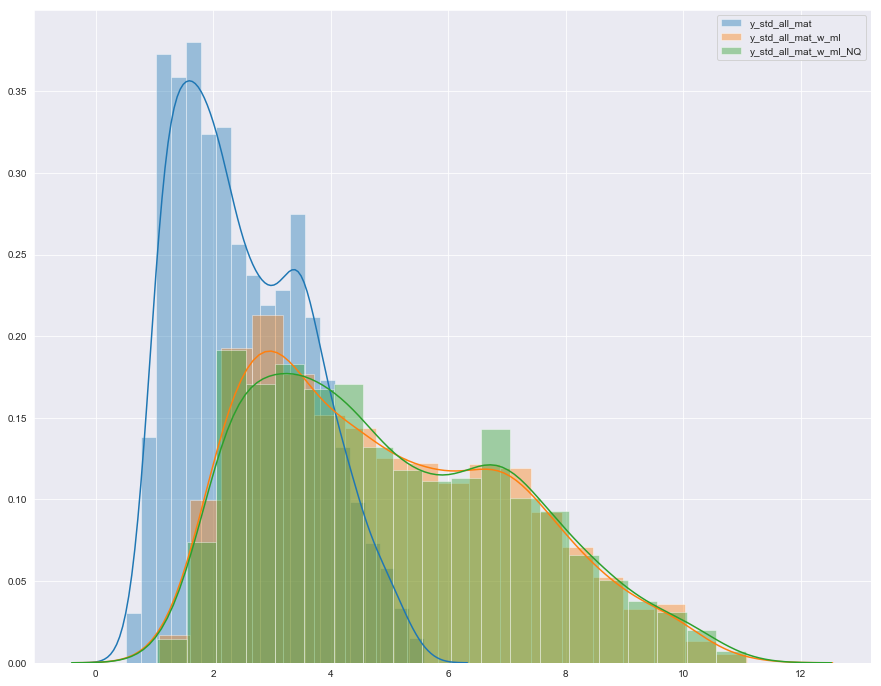

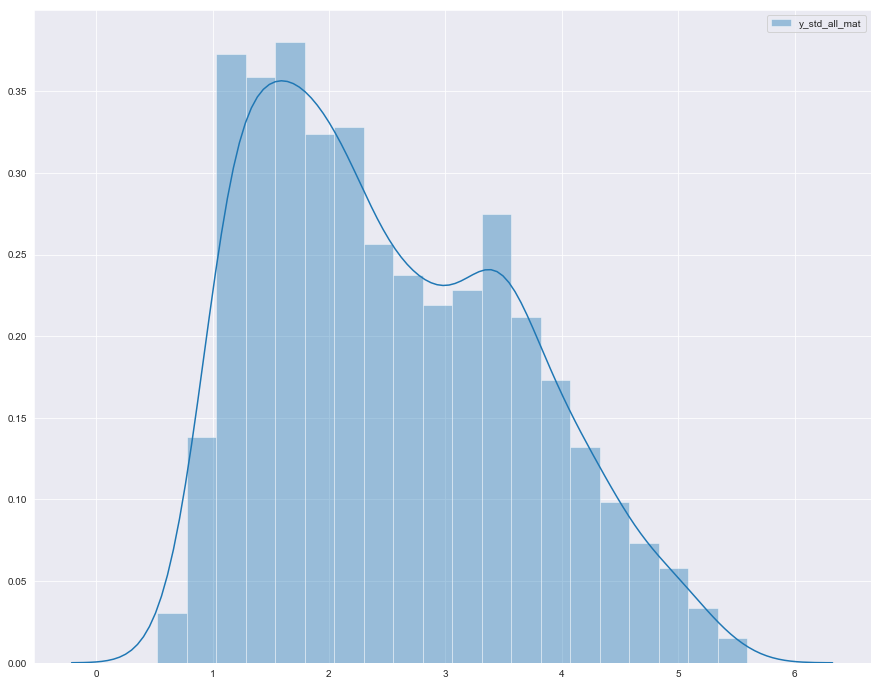

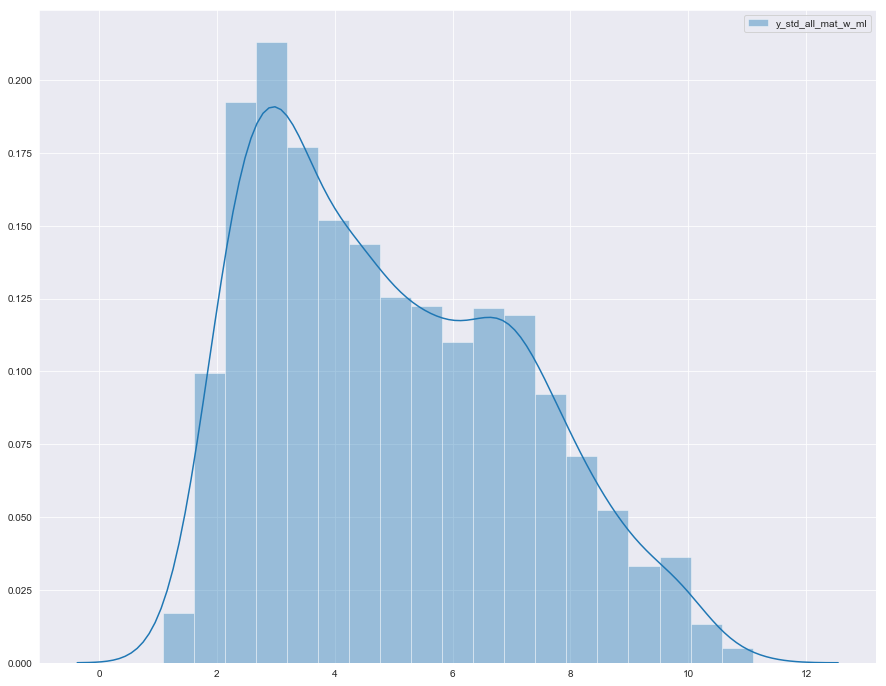

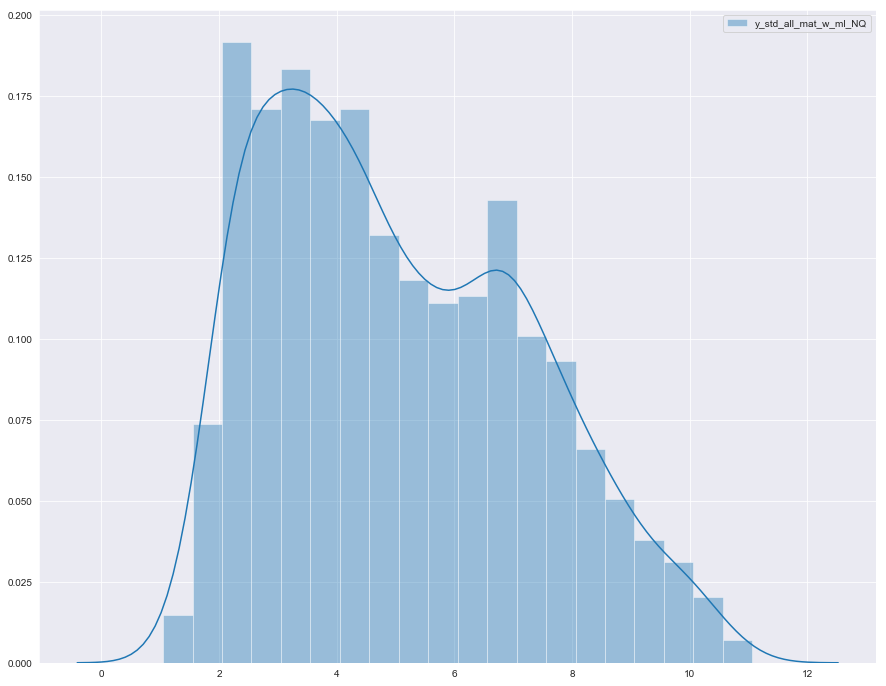

STANDARD DEVIATION WITHOUT ML


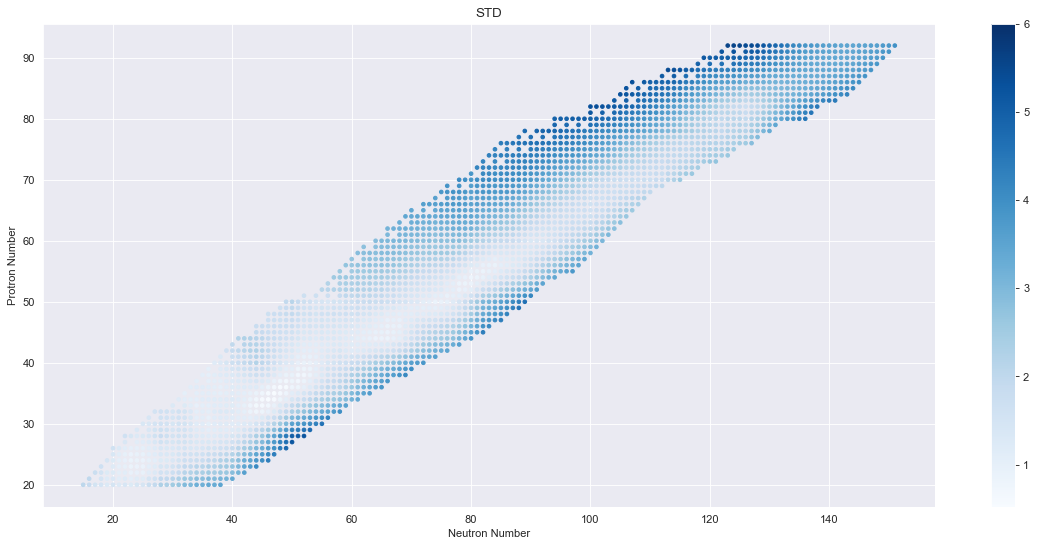

STANDARD DEVIATION WITH ML of ZQ


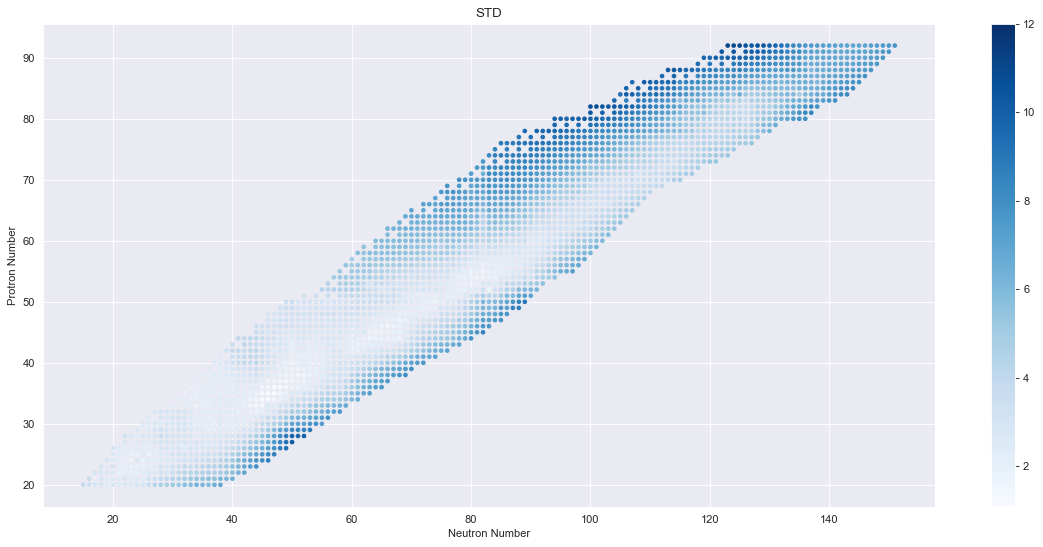

STANDARD DEVIATION WITH ML of NQ


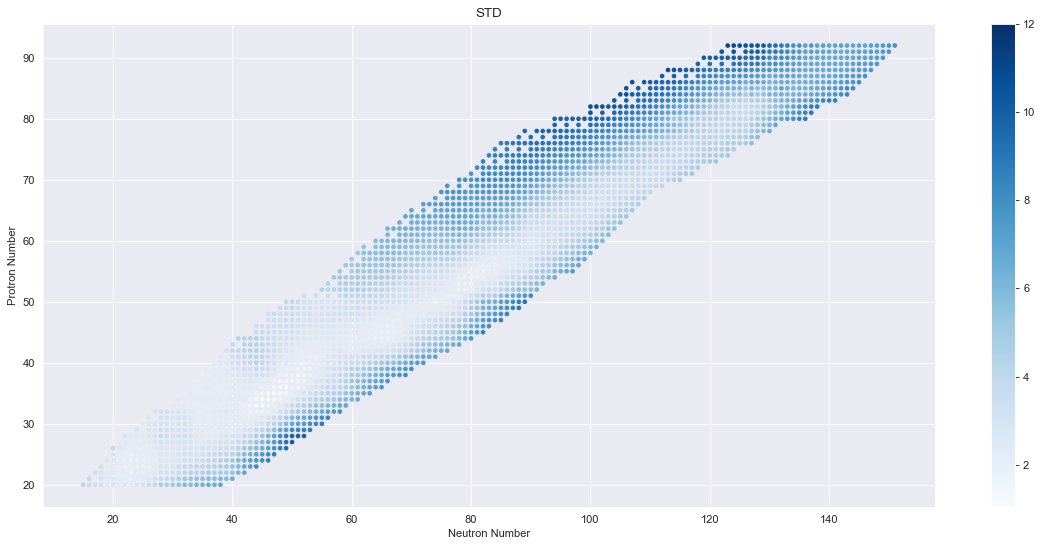

MEAN WITHOUT ML


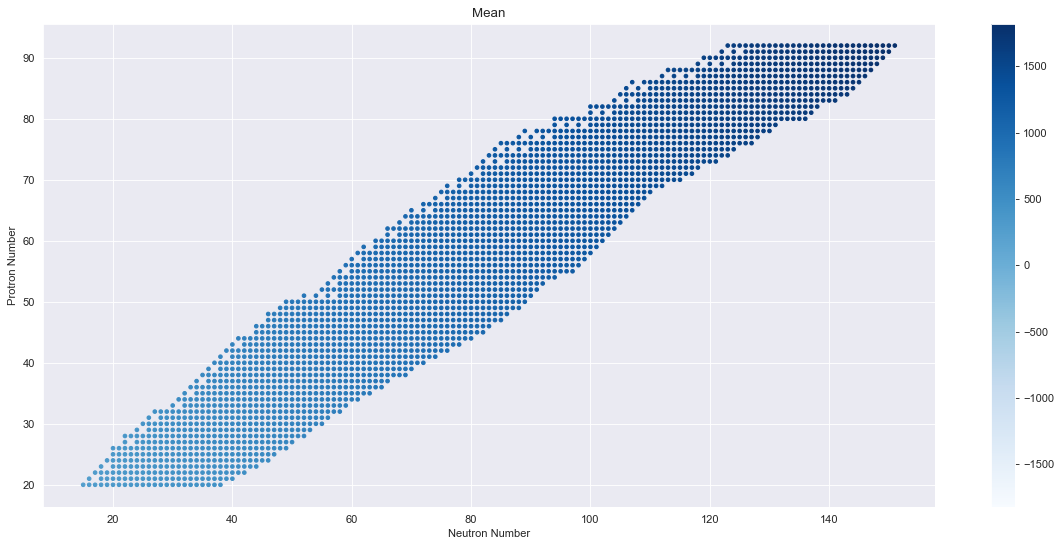

MEAN WITH ML


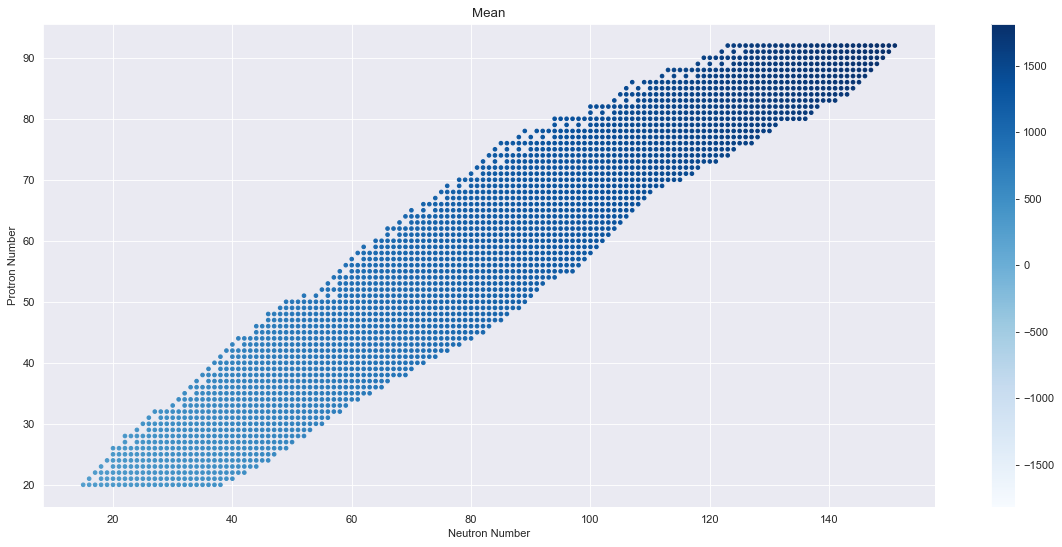

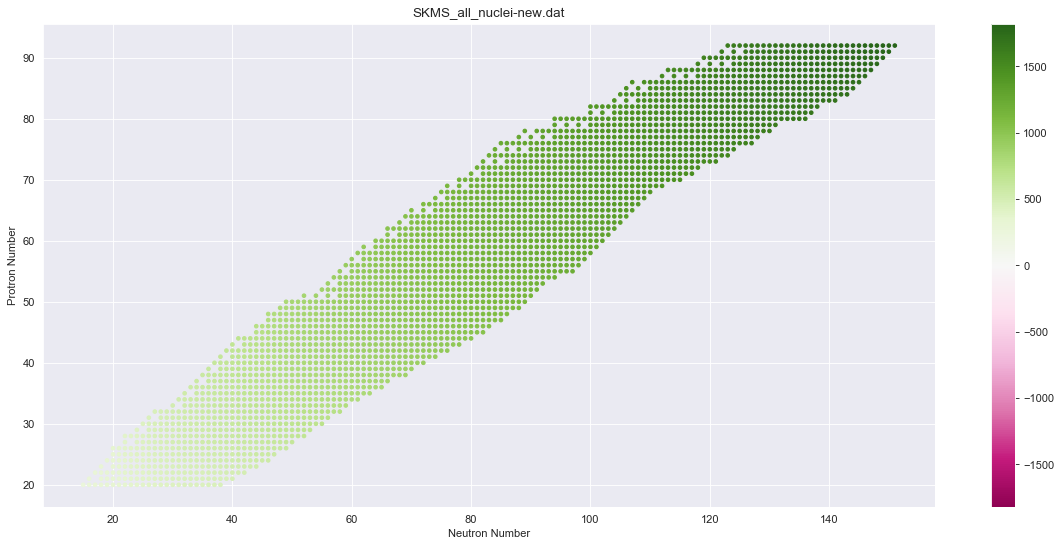

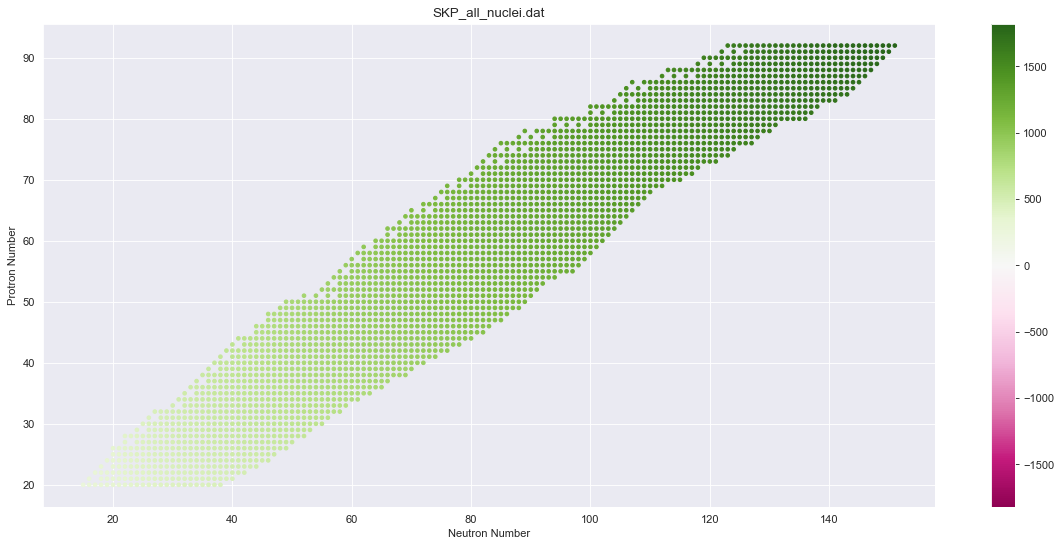

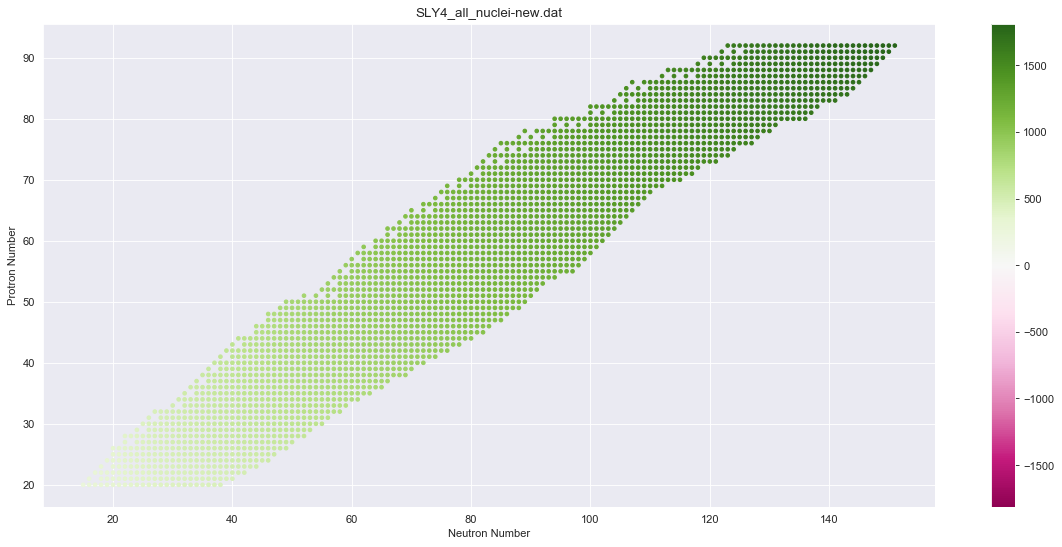

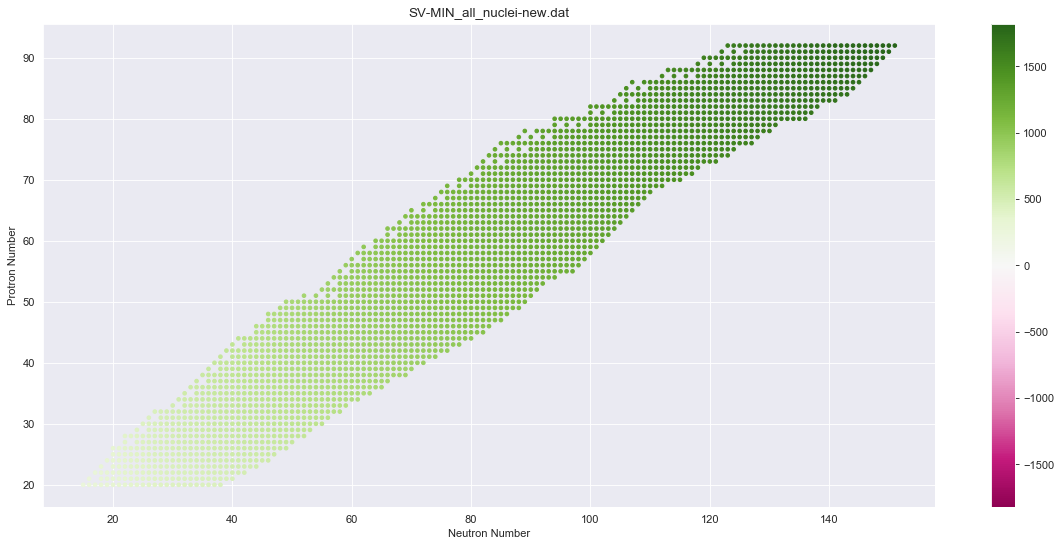

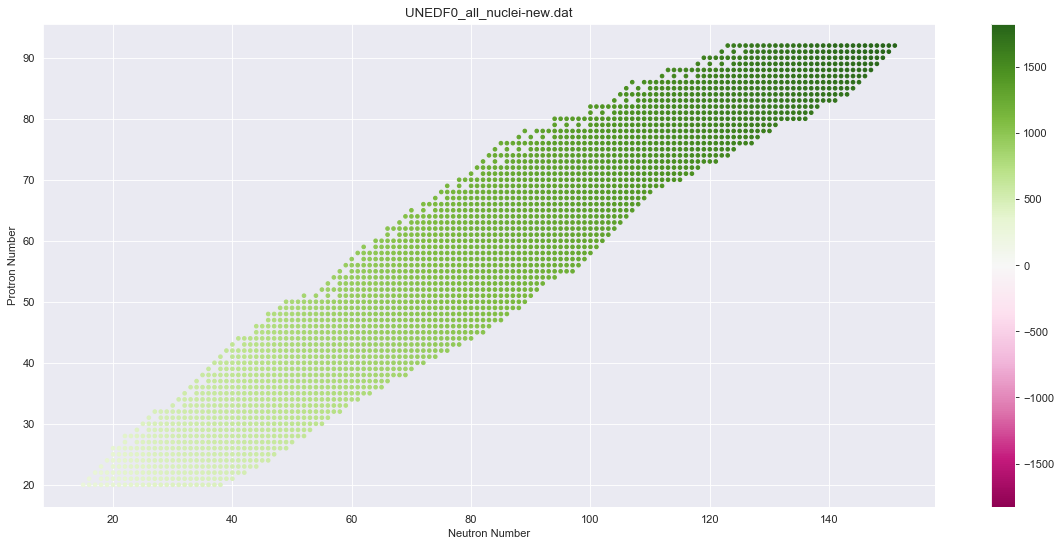

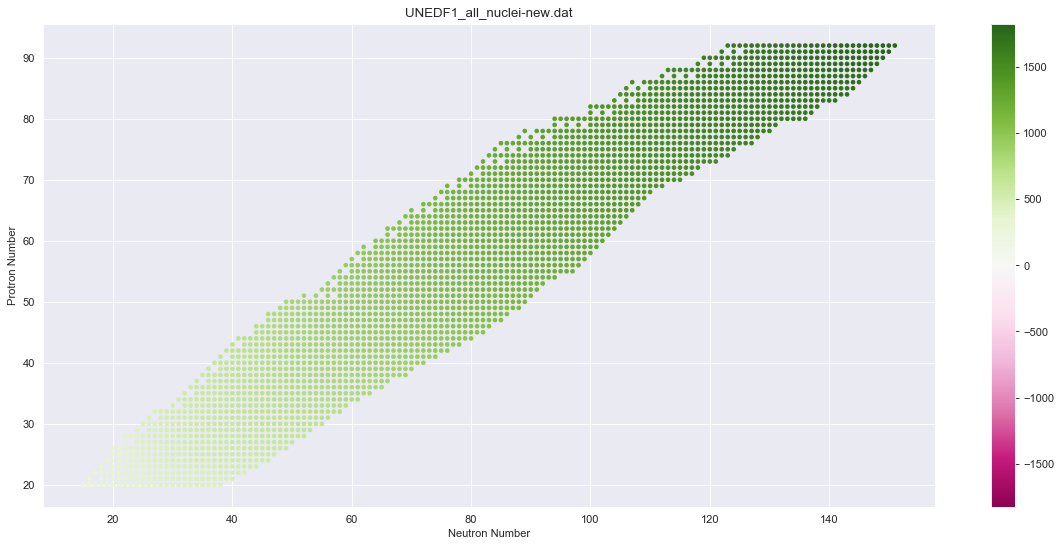

In [273]:
print(np.mean(y_std_all_mat))           
print(np.mean(y_std_all_mat_w_ml))
print(np.mean(y_std_all_mat_w_ml_NQ))

j=0
for i in range(0,len(y_std_all_mat_w_ml)):
    if y_std_all_mat_w_ml[i]>17.5:
        j=j+1
print("ZQ ml ", j)
    

j=0
for i in range(0,len(y_std_all_mat_w_ml_NQ)):
    if y_std_all_mat_w_ml_NQ[i]>17.5:
        j=j+1
print("NQ ml ", j)


sns.distplot(y_std_all_mat, label='y_std_all_mat')
sns.distplot(y_std_all_mat_w_ml, label='y_std_all_mat_w_ml')
sns.distplot(y_std_all_mat_w_ml_NQ, label='y_std_all_mat_w_ml_NQ')
plt.legend()
plt.show()


sns.distplot(y_std_all_mat, label='y_std_all_mat')
plt.legend()
plt.show()
   
sns.distplot(y_std_all_mat_w_ml, label='y_std_all_mat_w_ml')
plt.legend()
plt.show()
    
sns.distplot(y_std_all_mat_w_ml_NQ, label='y_std_all_mat_w_ml_NQ')
plt.legend()
plt.show()
    
    
print("STANDARD DEVIATION WITHOUT ML")
ext = np.int(np.ceil(max(y_std_all_mat)))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(N_all_mat,Z_all_mat,c=y_std_all_mat,cmap='Blues',vmax=ext,s=10)
plt.colorbar(sc)
plt.title("STD")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()


print("STANDARD DEVIATION WITH ML of ZQ")
ext = np.int(np.ceil(max(y_std_all_mat_w_ml)))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(N_all_mat,Z_all_mat,c=y_std_all_mat_w_ml,cmap='Blues',vmax=ext,s=10)
plt.colorbar(sc)
plt.title("STD")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()


print("STANDARD DEVIATION WITH ML of NQ")
ext = np.int(np.ceil(max(y_std_all_mat_w_ml_NQ)))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(N_all_mat,Z_all_mat,c=y_std_all_mat_w_ml_NQ,cmap='Blues',vmax=ext,s=10)
plt.colorbar(sc)
plt.title("STD")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()


print("MEAN WITHOUT ML")
ext = np.int(np.ceil(max(-np.min(y_mean_all_mat),np.max(y_mean_all_mat))))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(N_all_mat,Z_all_mat,c=y_mean_all_mat,cmap='Blues',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.title("Mean")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()


print("MEAN WITH ML")
ext = np.int(np.ceil(max(-np.min(y_mean_all_mat_w_ml),np.max(y_mean_all_mat_w_ml))))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(N_all_mat,Z_all_mat,c=y_mean_all_mat_w_ml,cmap='Blues',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.title("Mean")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()


for i in range(0,6):
    ext = np.int(np.ceil(max(-np.min(y_all_mat[i]),np.max(y_all_mat[i]))))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(N_all_mat,Z_all_mat,c=y_all_mat[i],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    

   



#binding energy as a function of n 
    
    

# DON't Pass this point

# DON't Pass this point

# DON't Pass this point

# DON't Pass this point

In [63]:
ZN_dripline  =[ [], #0 
                [], #1
                [], #2
                [], #3
                [], #4
                [] ]#5



for i in range(0,6):
    for X_the_i in X_the[i]:
        
        try:
            
            #print("Z: ", X_the_i[0], " N: ", X_the_i[1], " y_the: ",  X_the_i[3], " Q_the: ",  X_the_i[8], "\n")
            #print("rf_ZQ predicted: ", rf_ZQ_name[i].predict([[X_the_i[0],  X_the_i[8]]]), "\n")
            #print("the+ml: ", X_the_i[3]+rf_ZQ_name[i].predict([[X_the_i[0],  X_the_i[8]]]), "\n")
            
            try:
                
                print("names: ", names[i])
                print("Z:                   ", X_the_i[0])
                print("N:                   ", X_the_i[1])
                print("Q: X_the_i[8]        ", X_the_i[8])
                print("y_the: X_the_i[3]    ", X_the_i[3], "\n")
                
                
                if Z_last != X_the_i[0] or N_last != X_the_i[1]-1:
                    del(Z_last)
                    del(N_last)
                    del(Q_last)
                    del(y_the_last)
                    del(ml_last)
                
                now=X_the_i[3]  +rf_ZQ_name[i].predict([[X_the_i[0],  X_the_i[8]]])
                last=y_the_last +rf_ZQ_name[i].predict([[Z_last,  Q_last]])
                
                
                
                print("Q_last:              ", Q_last)
                print("y_the_last           ", y_the_last, "\n")
                
                print("curr ml:             ", rf_ZQ_name[i].predict([[X_the_i[0],  X_the_i[8]]]))
                print("last ml:             ", rf_ZQ_name[i].predict([[Z_last,  Q_last]]))
                print("ml_last:             ", ml_last, "\n")
                
                print("separation E +ml:    ", now-last )
                print("separation E:        ", X_the_i[3]-y_the_last )
                print("Separation E given:  ", -X_the_i[5])
                print("Separation E diff:   ", X_the_i[3]-y_the_last+X_the_i[5], '\n\n\n')
                print("EXP: ", y_exp_d[ X_the_i[0], X_the_i[1]], "\n\n\n",)
                
                if (now-last)<=0:
                    
                    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                    print("names: ", names[i])
                    print("Z:                   ", X_the_i[0])
                    print("N:                   ", X_the_i[1])
                    print("separation E +ml:    ", now-last )
                    print("separation E:        ", X_the_i[3]-y_the_last )
                    print("Separation E given:  ", -X_the_i[5])
                    print("Separation E diff:   ", X_the_i[3]-y_the_last+X_the_i[5], '\n\n\n')
                    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                    #NEUTRON DRIP LINE:
                    ZN_dripline[i].append( (X_the_i[0], X_the_i[1]) )
                
                
                Z_last=X_the_i[0]
                N_last=X_the_i[1]
                Q_last=X_the_i[8]
                y_the_last=X_the_i[3]
                ml_last=rf_ZQ_name[i].predict([[X_the_i[0],  X_the_i[8]]])
                
                
            except NameError:
                Z_last=X_the_i[0]
                N_last=X_the_i[1]
                Q_last=X_the_i[8]
                y_the_last=X_the_i[3]
                ml_last=rf_ZQ_name[i].predict([[X_the_i[0],  X_the_i[8]]])
                #print("NAME ERROR")
                #print("NAME ERROR\n")
                continue
        
        except KeyError:
            #print("KEY ERROR")
            #print("KEY ERROR")
            #print("KEY ERROR \n")
            continue
        
        
          

names:  SKMS_all_nuclei-new.dat
Z:                    20.0
N:                    14.0
Q: X_the_i[8]         8.701805
y_the: X_the_i[3]     252.133057 

names:  SKMS_all_nuclei-new.dat
Z:                    20.0
N:                    15.0
Q: X_the_i[8]         7.480085
y_the: X_the_i[3]     267.741621 

Q_last:               8.701805
y_the_last            252.133057 

curr ml:              [4.64269965]
last ml:              [5.83797867]
ml_last:              [5.83797867] 

separation E +ml:     [14.41328498]
separation E:         15.608564000000001
Separation E given:   15.608564
Separation E diff:    1.7763568394002505e-15 



EXP:  262.026409 



names:  SKMS_all_nuclei-new.dat
Z:                    20.0
N:                    16.0
Q: X_the_i[8]         6.186146
y_the: X_the_i[3]     286.600887 

Q_last:               7.480085
y_the_last            267.741621 

curr ml:              [1.63694566]
last ml:              [4.64269965]
ml_last:              [4.64269965] 

separation E +ml:  

curr ml:              [6.09320855]
last ml:              [7.14701201]
ml_last:              [7.14701201] 

separation E +ml:     [3.40240354]
separation E:         4.456206999999949
Separation E given:   4.456207
Separation E diff:    -5.062616992290714e-14 



EXP:  432.303972 



names:  SKMS_all_nuclei-new.dat
Z:                    20.0
N:                    32.0
Q: X_the_i[8]         13.437232
y_the: X_the_i[3]     445.657535 

Q_last:               13.458918
y_the_last            438.767257 

curr ml:              [6.98362178]
last ml:              [6.09320855]
ml_last:              [6.09320855] 

separation E +ml:     [7.78069123]
separation E:         6.890278000000023
Separation E given:   6.890278
Separation E diff:    2.3092638912203256e-14 



EXP:  438.309221 



names:  SKMS_all_nuclei-new.dat
Z:                    20.0
N:                    33.0
Q: X_the_i[8]         12.82362
y_the: X_the_i[3]     448.29275 

Q_last:               13.437232
y_the_last            445.65753

names:  SKMS_all_nuclei-new.dat
Z:                    21.0
N:                    20.0
Q: X_the_i[8]         5.932001
y_the: X_the_i[3]     344.217222 

Q_last:               5.30085
y_the_last            328.673455 

curr ml:              [1.37742618]
last ml:              [2.43481256]
ml_last:              [2.43481256] 

separation E +ml:     [14.48638062]
separation E:         15.543767000000003
Separation E given:   15.543768
Separation E diff:    -9.999999974752427e-07 



EXP:  343.116225 



names:  SKMS_all_nuclei-new.dat
Z:                    21.0
N:                    21.0
Q: X_the_i[8]         5.831073
y_the: X_the_i[3]     354.543891 

Q_last:               5.932001
y_the_last            344.217222 

curr ml:              [0.82992907]
last ml:              [1.37742618]
ml_last:              [1.37742618] 

separation E +ml:     [9.77917189]
separation E:         10.326668999999981
Separation E given:   10.326669
Separation E diff:    -1.9539925233402755e-14 



EXP:  354.6662

curr ml:              [6.94803715]
last ml:              [4.71282803]
ml_last:              [4.71282803] 

separation E +ml:     [7.09779811]
separation E:         4.862589000000014
Separation E given:   4.862589
Separation E diff:    1.4210854715202004e-14 



EXP:  464.610788 





KeyboardInterrupt: 

In [26]:
ZN_dripline[0]
#for i in range(0,6):
#    plt.plot(np.transpose(ZN_dripline[i])[1],np.transpose(ZN_dripline[i])[0], "o")
#    plt.xlabel("Neutrons")
#    plt.ylabel("Protrons")
#    plt.show()

[]

In [ ]:
for X_the_i in X_the[0]:
        try:
            
            if rf_ZQ_name[i].predict([[X_the_i[0],  X_the_i[8]]])<=0:
                print("Z: ", X_the_i[0], " N: ", X_the_i[1], " y_the: ",  X_the_i[3], " Q_the: ",  X_the_i[8])
            
                print("rf_ZQ predicted: ", rf_ZQ_name[i].predict([[X_the_i[0],  X_the_i[8]]]))
            
                print("the+ml: ", X_the_i[3]+rf_ZQ_name[i].predict([[X_the_i[0],  X_the_i[8]]]))
            
                print("EXP: ", y_exp_d[ X_the_i[0], X_the_i[1]], "\n\n\n",)
        except KeyError:
            continue
        

In [ ]:

ZN_dripline  =[ [], #0 
                [], #1
                [], #2
                [], #3
                [], #4
                [] ]#5

ZN_dripline[0].append(np.transpose(np.stack((1,2))))
ZN_dripline[0].append(np.transpose(np.stack((3,4))))

ZN_dripline[0]


In [ ]:
ZN_dripline  =[ [], #0 
                [], #1
                [], #2
                [], #3
                [], #4
                [] ]#5

ZN_dripline[0].append((1,2))
ZN_dripline[0].append((3,4))

print(np.transpose(ZN_dripline[0])[0])


ZN_dripline[0]